# Freedon of Information Complaints EDA

Hello to my EDA of the Freedon of Information Complaints from Israel Aug 2024.


Datasets from:
https://data.gov.il/dataset/hofesh_hameida

In [6]:
# Imports

import re

# EDA packages
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.dates as mdates
%matplotlib inline
import seaborn as sns

#statistical models
from scipy.stats import ttest_ind
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Get Data from APIs
import json
import urllib.request



In [7]:
# Retrive data from API

# URL for the API request

url_pre_april_2021 = 'https://data.gov.il/api/3/action/datastore_search?resource_id=38fc6470-0440-47bb-9eb2-b32dd9c30aec'
url_post_april_2021 = 'https://data.gov.il/api/3/action/datastore_search?resource_id=b460e022-0f7c-48c6-ba64-ce16e1340056'

# Open the URL and read the response

fileobj_pre = urllib.request.urlopen(url_pre_april_2021)
fileobj_post = urllib.request.urlopen(url_post_april_2021)
r_pre = fileobj_pre.read()
r_post = fileobj_post.read()

# Decode the bytes to a string
r_str_pre = r_pre.decode('utf-8')
r_str_post = r_post.decode('utf-8')

# Parse the JSON data
data_pre = json.loads(r_str_pre)
data_post = json.loads(r_str_post)

# Convert the records (data['result']['records']) into a DataFrame
df_pre_april_2021 = pd.DataFrame(data_pre['result']['records'])
df_post_april_2021 = pd.DataFrame(data_post['result']['records'])


# Display the first few rows of the DataFrame
print(df_pre_april_2021.head())
print(df_post_april_2021.head())


   _id מספר תלונה   ערוץ קבלה תאריך בקשה ראשונית ל מידע נושא  התלונה  \
0    1       2/19  טופס מקוון       2018-11-26T00:00:00  חוסר בהנמקה   
1    2       4/19  טופס מקוון       2018-11-27T00:00:00  אי מתן מענה   
2    3       5/19  טופס מקוון       2018-08-09T00:00:00  אי מתן מענה   
3    4       6/19  טופס מקוון       2018-03-03T00:00:00  אי מתן מענה   
4    5       8/19       דוא"ל       2018-11-18T00:00:00  אי מתן מענה   

      תאריך קבלת תלונה                              שם הנילון  \
0  2019-01-03T00:00:00  משרד העבודה הרווחה והשירותים החברתיים   
1  2019-01-13T00:00:00                 הנהלת בתי הדין הרבניים   
2  2019-01-16T00:00:00                        משרד ראש הממשלה   
3  2019-01-17T00:00:00                             משרד האוצר   
4  2019-01-27T13:25:00                             משרד האוצר   

          תאריך הסגירה תיאור החלטה  
0  2019-03-21T12:15:12       מוצדק  
1  2019-02-17T09:04:41  בלתי מוצדק  
2  2019-03-24T18:04:32       מוצדק  
3  2019-03-11T11:22:06      

In [8]:
## Backup initial data retrived

# Define file paths for saving the CSVs
pre_file_path = '../data/df_pre_april_2021_init.csv'
post_file_path = '../data/df_post_april_2021_init.csv'

# Save the DataFrames to CSV files
df_pre_april_2021.to_csv(pre_file_path, index=False)
df_post_april_2021.to_csv(post_file_path, index=False)

In [9]:
## Fetching backup

df_pre_april_2021 = pd.read_csv(filepath_or_buffer ='../data/df_pre_april_2021_init.csv')
df_post_april_2021 = pd.read_csv(filepath_or_buffer ='../data/df_post_april_2021_init.csv')

### ReNaming columns

In [10]:
# Initial columns names
print("Columns in df_pre_april_2021:\n", df_pre_april_2021.columns)
print("Columns in df_post_april_2021:\n", df_post_april_2021.columns)

Columns in df_pre_april_2021:
 Index(['_id', 'מספר תלונה', 'ערוץ קבלה', 'תאריך בקשה ראשונית ל מידע',
       'נושא  התלונה', 'תאריך קבלת תלונה', 'שם הנילון', 'תאריך הסגירה',
       'תיאור החלטה'],
      dtype='object')
Columns in df_post_april_2021:
 Index(['_id', 'מספר התלונה', 'תאריך הגשת הבקשה למידע', 'תאריך קבלת תלונה',
       'ערוץ קבלת תלונה', 'סוג המתלונן', 'שם המתלונן', 'נושא התלונה',
       'שם הנילון', 'נושא בקשת חופש מידע', 'סטטוס', 'החלטה',
       'תאריך סיום טיפול', 'מספר ימי טיפול'],
      dtype='object')


In [11]:
# Translation dictionary for df_pre_april_2021
pre_translation_dict = {
    '_id': '_id',
    'מספר תלונה': 'Complaint Number',
    'ערוץ קבלה': 'Channel of Receipt',
    'תאריך בקשה ראשונית ל מידע': 'Initial Request Date for Information',
    'נושא  התלונה': 'Complaint Subject',
    'תאריך קבלת תלונה': 'Complaint Receipt Date',
    'שם הנילון': 'Entity Complained Against',
    'תאריך הסגירה': 'Closing Date',
    'תיאור החלטה': 'Decision'
}

# Translation dictionary for df_post_april_2021
post_translation_dict = {
    '_id': '_id',
    'מספר התלונה': 'Complaint Number',  
    'תאריך הגשת הבקשה למידע': 'Initial Request Date for Information',
    'תאריך קבלת תלונה': 'Complaint Receipt Date',
    'ערוץ קבלת תלונה': 'Channel of Receipt', 
    'סוג המתלונן': 'Complainant Type',
    'שם המתלונן': 'Complainant Name',
    'נושא התלונה': 'Complaint Subject', 
    'שם הנילון': 'Entity Complained Against',
    'נושא בקשת חופש מידע': 'Freedom of Information Request Subject',
    'סטטוס': 'Status',
    'החלטה': 'Decision',
    'תאריך סיום טיפול': 'Closing Date', 
    'מספר ימי טיפול': 'Number of Treatment Days'
}

# Rename columns in df_pre_april_2021
df_pre_april_2021.rename(columns=pre_translation_dict, inplace=True)

# Rename columns in df_post_april_2021
df_post_april_2021.rename(columns=post_translation_dict, inplace=True)

# Columns name change validation

print("Columns in df_pre_april_2021:\n", df_pre_april_2021.columns)
print("Columns in df_post_april_2021:\n", df_post_april_2021.columns)


Columns in df_pre_april_2021:
 Index(['_id', 'Complaint Number', 'Channel of Receipt',
       'Initial Request Date for Information', 'Complaint Subject',
       'Complaint Receipt Date', 'Entity Complained Against', 'Closing Date',
       'Decision'],
      dtype='object')
Columns in df_post_april_2021:
 Index(['_id', 'Complaint Number', 'Initial Request Date for Information',
       'Complaint Receipt Date', 'Channel of Receipt', 'Complainant Type',
       'Complainant Name', 'Complaint Subject', 'Entity Complained Against',
       'Freedom of Information Request Subject', 'Status', 'Decision',
       'Closing Date', 'Number of Treatment Days'],
      dtype='object')


### Convert Date Columns to datetime

In [12]:
# Display the first few rows of the DataFrame to identify data Formats
print(df_pre_april_2021[['Complaint Receipt Date', 'Closing Date', 'Initial Request Date for Information']].head())
print(df_post_april_2021[['Complaint Receipt Date', 'Closing Date', 'Initial Request Date for Information']].head())

  Complaint Receipt Date         Closing Date  \
0    2019-01-03T00:00:00  2019-03-21T12:15:12   
1    2019-01-13T00:00:00  2019-02-17T09:04:41   
2    2019-01-16T00:00:00  2019-03-24T18:04:32   
3    2019-01-17T00:00:00  2019-03-11T11:22:06   
4    2019-01-27T13:25:00  2019-06-17T14:27:44   

  Initial Request Date for Information  
0                  2018-11-26T00:00:00  
1                  2018-11-27T00:00:00  
2                  2018-08-09T00:00:00  
3                  2018-03-03T00:00:00  
4                  2018-11-18T00:00:00  
  Complaint Receipt Date Closing Date Initial Request Date for Information
0    2021-09-05 00:00:00   20/06/2021                  2021-01-03 00:00:00
1    2021-05-14 00:00:00   17/11/2021                  2020-10-23 00:00:00
2    2021-05-19 00:00:00   30/08/2021                  2021-04-20 00:00:00
3    2021-08-06 00:00:00   09/06/2021                  2021-06-06 00:00:00
4    2021-04-07 00:00:00   21/07/2021                  2020-02-23 00:00:00


In [13]:
# Convert date columns in df_pre_april_2021 to datetime with explicit format handling

df_pre_april_2021['Complaint Receipt Date'] = pd.to_datetime(df_pre_april_2021['Complaint Receipt Date'], format='%Y-%m-%dT%H:%M:%S', errors='coerce')
df_pre_april_2021['Closing Date'] = pd.to_datetime(df_pre_april_2021['Closing Date'], format='%Y-%m-%dT%H:%M:%S', errors='coerce')
df_pre_april_2021['Initial Request Date for Information'] = pd.to_datetime(df_pre_april_2021['Initial Request Date for Information'], format='%Y-%m-%dT%H:%M:%S', errors='coerce')

# Convert date columns in df_post_april_2021 to datetime with explicit format handling

df_post_april_2021['Complaint Receipt Date'] = pd.to_datetime(df_post_april_2021['Complaint Receipt Date'], format='%Y-%m-%d %H:%M:%S', errors='coerce')
# Handle Closing Date separately, with NaT check
df_post_april_2021['Closing Date'] = df_post_april_2021['Closing Date'].apply(
    lambda x: pd.to_datetime(x, format='%d/%m/%Y', errors='coerce') if pd.notnull(x) and '/' in x else pd.to_datetime(x, errors='coerce')
)
df_post_april_2021['Initial Request Date for Information'] = pd.to_datetime(df_post_april_2021['Initial Request Date for Information'], format='%Y-%m-%d %H:%M:%S', errors='coerce')

# Verify the Conversion

# Display the first few rows of the DataFrame to verify conversion
print(df_pre_april_2021[['Complaint Receipt Date', 'Closing Date', 'Initial Request Date for Information']].head())
print(df_post_april_2021[['Complaint Receipt Date', 'Closing Date', 'Initial Request Date for Information']].head())

  Complaint Receipt Date        Closing Date  \
0    2019-01-03 00:00:00 2019-03-21 12:15:12   
1    2019-01-13 00:00:00 2019-02-17 09:04:41   
2    2019-01-16 00:00:00 2019-03-24 18:04:32   
3    2019-01-17 00:00:00 2019-03-11 11:22:06   
4    2019-01-27 13:25:00 2019-06-17 14:27:44   

  Initial Request Date for Information  
0                           2018-11-26  
1                           2018-11-27  
2                           2018-08-09  
3                           2018-03-03  
4                           2018-11-18  
  Complaint Receipt Date Closing Date Initial Request Date for Information
0             2021-09-05   2021-06-20                           2021-01-03
1             2021-05-14   2021-11-17                           2020-10-23
2             2021-05-19   2021-08-30                           2021-04-20
3             2021-08-06   2021-06-09                           2021-06-06
4             2021-04-07   2021-07-21                           2020-02-23


In [14]:
# Fill Missing "Complaint Receipt Date" and 'Initial Request Date for Information' in df_pre_april_2021

df_pre_april_2021['Complaint Receipt Date'] = df_pre_april_2021['Complaint Receipt Date'].mask(
    df_pre_april_2021['Complaint Receipt Date'].isnull() & df_pre_april_2021['Initial Request Date for Information'].notnull(),
    df_pre_april_2021['Initial Request Date for Information']
)

df_pre_april_2021['Initial Request Date for Information'] = df_pre_april_2021['Initial Request Date for Information'].fillna(
    df_pre_april_2021['Complaint Receipt Date']
)

In [15]:
# Calculating Number of Treatment Days

df_pre_april_2021['Number of Treatment Days'] = (df_pre_april_2021['Closing Date']-df_pre_april_2021['Complaint Receipt Date']).dt.days

# Check the result
print(df_pre_april_2021[['Complaint Receipt Date', 'Closing Date', 'Number of Treatment Days']].head())


  Complaint Receipt Date        Closing Date  Number of Treatment Days
0    2019-01-03 00:00:00 2019-03-21 12:15:12                        77
1    2019-01-13 00:00:00 2019-02-17 09:04:41                        35
2    2019-01-16 00:00:00 2019-03-24 18:04:32                        67
3    2019-01-17 00:00:00 2019-03-11 11:22:06                        53
4    2019-01-27 13:25:00 2019-06-17 14:27:44                       141


In [16]:
# Due to the fact that Complainant Name in df_post_april_2021 has 500 null values from 641 entries, so it's ambiguous and removed. # Also considering privacy issue it is best removed

number_of_null_names = df_post_april_2021['Complainant Name'].isnull().sum()
total_entries = df_post_april_2021['_id'].count()

print(f"Number of null values in 'Complainant Name': {number_of_null_names}")
print(f"Total number of entries: {total_entries}")

# Remove the Complainant Name column
df_post_april_2021.drop(columns=['Complainant Name'], inplace=True)

# Verify the column removal
print(df_post_april_2021.columns)

Number of null values in 'Complainant Name': 502
Total number of entries: 642
Index(['_id', 'Complaint Number', 'Initial Request Date for Information',
       'Complaint Receipt Date', 'Channel of Receipt', 'Complainant Type',
       'Complaint Subject', 'Entity Complained Against',
       'Freedom of Information Request Subject', 'Status', 'Decision',
       'Closing Date', 'Number of Treatment Days'],
      dtype='object')


In [17]:
# Replace the null values in the 'Complaint Subject' column of df_pre_april_2021 with 'Unknown'
df_pre_april_2021['Complaint Subject'] = df_pre_april_2021['Complaint Subject'].fillna('Unknown')

# Verify the change
print(df_pre_april_2021['Complaint Subject'].head())

# Replace the null values in the 'Freedom of Information Request Subject' column of df_post_april_2021 with 'Unknown'
df_post_april_2021['Freedom of Information Request Subject'] = df_post_april_2021['Freedom of Information Request Subject'].fillna('Unknown')

# Verify the change
print(df_post_april_2021['Freedom of Information Request Subject'].head())


0    חוסר בהנמקה
1    אי מתן מענה
2    אי מתן מענה
3    אי מתן מענה
4    אי מתן מענה
Name: Complaint Subject, dtype: object
0    דוח מוניטור בנושא יישום דו"ח מבקר שנתי )2010 )...
1                        נתונים על מחלקות פסיכיאטריות 
2                                      פרמיות סטודנטים
3                           אי מתן מענה סמוכין 273664 
4                  דישון KCL אורגני לשנה בקרקעות ישראל
Name: Freedom of Information Request Subject, dtype: object


In [18]:
# Translation mapping for "Complaint Subject"
complaint_subject_translation_dict = {
    'אי מתן מענה': 'No Response',
    'חוסר בהנמקה': 'Lack of Justification',
    'Unknown': 'Unknown',
    'אגרות': 'Fees',
    'דין וחשבון שנתי': 'Annual Report',
    'הנחיות מנהליות': 'Administrative Guidelines',
    'מידע סביבתי': 'Environmental Information',
    'פרסום הנחיות מנהליות': 'Publication of Administrative Guidelines'
}

# Apply the translation mapping to the "Complaint Subject" column in df_pre_april_2021
df_pre_april_2021['Complaint Subject'] = df_pre_april_2021['Complaint Subject'].map(complaint_subject_translation_dict)

# Apply the translation mapping to the "Complaint Subject" column in df_post_april_2021
df_post_april_2021['Complaint Subject'] = df_post_april_2021['Complaint Subject'].map(complaint_subject_translation_dict)

# Verify the translations by checking the unique values in each column
unique_complaint_subjects_pre = df_pre_april_2021['Complaint Subject'].unique()
unique_complaint_subjects_post = df_post_april_2021['Complaint Subject'].unique()

unique_complaint_subjects_pre, unique_complaint_subjects_post

(array(['Lack of Justification', 'No Response',
        'Administrative Guidelines', 'Unknown',
        'Environmental Information', 'Annual Report', 'Fees'], dtype=object),
 array(['No Response', 'Lack of Justification', 'Fees',
        'Publication of Administrative Guidelines',
        'Environmental Information', 'Annual Report'], dtype=object))

In [19]:
# Translation mapping for 'Channel of Receipt'
# Dictionary to unify the values
channel_of_receipt_dict = {
    'טופס מקוון': 'Online Form',
    'דואר אלקטרוני': 'Email',
    'דוא"ל': 'Email',
    'פקס': 'Fax',
    'טלפון': 'Phone'
}

# Apply the dictionary to unify the "Channel of Receipt" column in df_pre_april_2021
df_pre_april_2021['Channel of Receipt'] = df_pre_april_2021['Channel of Receipt'].map(channel_of_receipt_dict)

# Apply the dictionary to unify the "Channel of Receipt" column in df_post_april_2021
df_post_april_2021['Channel of Receipt'] = df_post_april_2021['Channel of Receipt'].map(channel_of_receipt_dict)

# Validation
print(df_post_april_2021['Channel of Receipt'].value_counts())
print(df_pre_april_2021['Channel of Receipt'].value_counts())


Channel of Receipt
Online Form    587
Email           55
Name: count, dtype: int64
Channel of Receipt
Online Form    342
Email          100
Fax              1
Phone            1
Name: count, dtype: int64


In [20]:
# Translation mapping for pre "Decision" and post "Decision" columns
decision_translation_dict = {
    'מוצדק': 'Justified',
    'בלתי מוצדק': 'Unjustified',
    'הטיפול הופסק': 'Treatment Discontinued',
    'מוצדק חלקית': 'Partially Justified',
    '': 'Not Concluded',  
    'סיום טיפול': 'Treatment Completed'
}

# Apply the translation mapping to the "Decision Description" column in df_pre_april_2021
df_pre_april_2021['Decision'] = df_pre_april_2021['Decision'].map(decision_translation_dict)

# Apply the translation mapping to the "Decision" column in df_post_april_2021
df_post_april_2021['Decision'] = df_post_april_2021['Decision'].map(decision_translation_dict)

# Verify the translations by checking the unique values in each column
unique_decisions_pre = df_pre_april_2021['Decision'].unique()
unique_decisions_post = df_post_april_2021['Decision'].unique()

unique_decisions_pre, unique_decisions_post

(array(['Justified', 'Unjustified', 'Treatment Discontinued',
        'Partially Justified'], dtype=object),
 array(['Justified', 'Unjustified', 'Partially Justified', nan,
        'Treatment Completed'], dtype=object))

In [21]:
# Translation mapping for "Status" column
status_translation_dict = {
    'סיום טיפול': 'Treatment Completed',
    'בטיפול': 'In Treatment',
    '': 'No Status',
    'נשוא החלטת משרד הבריאות מה-13.11.22"': 'Subject to Ministry of Health Decision as of 13.11.22',
    'Unknown': "Unknown",
}

# Apply the translation mapping to the "Status" column in df_post_april_2021
df_post_april_2021['Status'] = df_post_april_2021['Status'].map(status_translation_dict)

# Null handeling
df_post_april_2021['Status'] = df_post_april_2021['Status'].fillna('Unknown')

# Verify the translations by checking the unique values in the "Status" column
unique_status_post = df_post_april_2021['Status'].unique()

unique_status_post

array(['Treatment Completed', 'Unknown', 'In Treatment'], dtype=object)

In [22]:
### Add a Status column to the df_pre_april_2021 DataFrame based on whether there is a Closing Date

# Create the 'Status' column based on the presence of 'Closing Date'
df_pre_april_2021['Status'] = df_pre_april_2021['Closing Date'].apply(
    lambda x: 'Treatment Completed' if pd.notnull(x) else 'In Treatment'
)

# Verify the new 'Status' column
df_pre_april_2021[['Closing Date', 'Status']].head()


,Closing Date,Status
0,2019-03-21 12:15:12,Treatment Completed
1,2019-02-17 09:04:41,Treatment Completed
2,2019-03-24 18:04:32,Treatment Completed
3,2019-03-11 11:22:06,Treatment Completed
4,2019-06-17 14:27:44,Treatment Completed


In [23]:
### Handeling duplication and error in the values of Entity Complained Against
print('Entities from df_pre_april_2021\n' )
print(df_pre_april_2021['Entity Complained Against'].unique())
print(df_pre_april_2021['Entity Complained Against'].value_counts())
print('Entities from df_post_april_2021\n')
print(df_post_april_2021['Entity Complained Against'].unique())
print(df_post_april_2021['Entity Complained Against'].value_counts())

Entities from df_pre_april_2021

['משרד העבודה הרווחה והשירותים החברתיים' 'הנהלת בתי הדין הרבניים'
 'משרד ראש הממשלה' 'משרד האוצר' 'משרד הבריאות'
 'משרד התחבורה והבטיחות בדרכים' 'רשות המסים בישראל' 'רשות האכיפה והגבייה'
 'משרד החקלאות ופיתוח הכפר' 'המשרד לביטחון פנים' 'הנהלת בתי המשפט'
 'משרד החינוך' 'משרד הביטחון' 'עיריית טבריה' 'רשות מקרקעי ישראל'
 'רשות המים והביוב' 'רשות האוכלוסין וההגירה' 'המשרד לביטחון הפנים'
 'המשרד להגנת הסביבה' 'משרד המשפטים' 'האפוטרופוס הכללי והכונס הרשמי'
 'צה"ל' 'צבא הגנה לישראל' 'משטרת ישראל' 'משרד העלייה והקליטה'
 'המשרד לנושאים אסטרטגיים והסברה' 'המשרד לשוויון חברתי'
 'רשות החברות הממשלתיות' 'משרד הפנים' 'מנהל אזרחי אזור יהודה ושומרון'
 'רשות התחרות' 'הרשות להסדרת התיישבות הבדואים בנגב'
 'רשות שוק ההון, הביטוח והחיסכון' 'הרבנות הראשית לישראל'
 'משרד הבינוי והשיכון' 'משרד התקשורת' 'נציבות שירות המדינה'
 'מרכז רפואי פוריה' 'בית חולים וולפסון' 'בית חולים איכילוב'
 'שירות בתי הסוהר' 'מתאם פעולות הממשלה בשטחים (מתפ"ש)' 'המשרד לשירותי דת'
 'משרד התיירות' 'משרד

In [24]:
# Function to clean and standardize entity names
def clean_entity_name(entity_name):
    # Remove leading/trailing whitespaces
    entity_name = entity_name.strip()
    # Replace special characters or unify them
    entity_name = re.sub(r'[^\w\s]', '', entity_name)
    return entity_name

# Apply cleaning function to the 'Entity Complained Against' column
df_pre_april_2021['Entity Complained Against'] = df_pre_april_2021['Entity Complained Against'].apply(clean_entity_name)
df_post_april_2021['Entity Complained Against'] = df_post_april_2021['Entity Complained Against'].apply(clean_entity_name)

# Check for duplicates by counting the cleaned names
duplicate_check_pre = df_pre_april_2021['Entity Complained Against'].value_counts()
duplicate_check_post = df_post_april_2021['Entity Complained Against'].value_counts()
print(duplicate_check_pre, duplicate_check_post)

Entity Complained Against
משרד הבריאות                             48
משרד החינוך                              37
משטרת ישראל                              32
המשרד להגנת הסביבה                       26
צהל                                      25
משרד ראש הממשלה                          21
משרד התחבורה והבטיחות בדרכים             21
משרד העבודה הרווחה והשירותים החברתיים    18
משרד החקלאות ופיתוח הכפר                 16
משרד האוצר                               15
נציבות שירות המדינה                      14
רשות מקרקעי ישראל                        13
משרד הפנים                               13
משרד המשפטים                             12
רשות האוכלוסין וההגירה                   11
משרד הביטחון                              9
מנהל אזרחי אזור יהודה ושומרון             8
המשרד לביטחון הפנים                       8
צבא הגנה לישראל                           7
משרד הבינוי והשיכון                       6
הנהלת בתי הדין הרבניים                    6
רשות שוק ההון הביטוח והחיסכון             6
מתאם פ

### Null handling

In [25]:
# Check for missing values
missing_values = df_post_april_2021.isnull().sum()
print("Missing values in df_post_april_2021 each column:\n", missing_values)
# Check for missing values
missing_values = df_pre_april_2021.isnull().sum()
print("Missing values in df_pre_april_2021 each column:\n", missing_values)

Missing values in df_post_april_2021 each column:
 _id                                        0
Complaint Number                           0
Initial Request Date for Information       0
Complaint Receipt Date                     0
Channel of Receipt                         0
Complainant Type                           0
Complaint Subject                          0
Entity Complained Against                  0
Freedom of Information Request Subject     0
Status                                     0
Decision                                  23
Closing Date                              23
Number of Treatment Days                   0
dtype: int64
Missing values in df_pre_april_2021 each column:
 _id                                     0
Complaint Number                        0
Channel of Receipt                      0
Initial Request Date for Information    0
Complaint Subject                       0
Complaint Receipt Date                  0
Entity Complained Against               0
Closing

In [26]:
# Display rows with any missing values in df_pre_april_2021
rows_with_nulls_pre = df_pre_april_2021[df_pre_april_2021.isnull().any(axis=1)]

# Display rows with any missing values in df_post_april_2021
rows_with_nulls_post = df_post_april_2021[df_post_april_2021.isnull().any(axis=1)]

rows_with_nulls_pre, rows_with_nulls_post


(Empty DataFrame
 Columns: [_id, Complaint Number, Channel of Receipt, Initial Request Date for Information, Complaint Subject, Complaint Receipt Date, Entity Complained Against, Closing Date, Decision, Number of Treatment Days, Status]
 Index: [],
      _id Complaint Number Initial Request Date for Information  \
 18    19           142/24                           2023-09-13   
 141  142           250/24                           2023-11-19   
 149  150           266/24                           2024-05-16   
 155  156           132/24                           2024-03-20   
 163  164           257/24                           2024-02-15   
 296  297           255/24                           2024-03-25   
 306  307           259/24                           2024-03-13   
 319  320           234/24                           2023-07-06   
 340  341           248/24                           2024-02-20   
 342  343           268/24                           2024-05-16   
 349  350     

In [27]:
## Backup

# Define file paths for saving the CSVs
pre_file_path = '../data/df_pre_april_2021.csv'
post_file_path = '../data/df_post_april_2021.csv'

# Save the DataFrames to CSV files
df_pre_april_2021.to_csv(pre_file_path, index=False)
df_post_april_2021.to_csv(post_file_path, index=False)

In [28]:
# Concatenate the two DataFrames.

# Determine the maximum _id in df_pre_april_2021
max_id_pre = df_pre_april_2021['_id'].max()

# Increment the _id in df_post_april_2021
df_post_april_2021['_id'] += max_id_pre

# Concatenate the DataFrames
df_combined = pd.concat([df_pre_april_2021, df_post_april_2021], ignore_index=True)

# Display the first few rows of the combined DataFrame to verify
print(df_combined.head())
print(df_combined.tail())

# Save the combined DataFrame to a CSV file
df_combined.to_csv('../data/combined_data.csv', index=False)

print("CSV file has been saved successfully.")

   _id Complaint Number Channel of Receipt  \
0    1             2/19        Online Form   
1    2             4/19        Online Form   
2    3             5/19        Online Form   
3    4             6/19        Online Form   
4    5             8/19              Email   

  Initial Request Date for Information      Complaint Subject  \
0                           2018-11-26  Lack of Justification   
1                           2018-11-27            No Response   
2                           2018-08-09            No Response   
3                           2018-03-03            No Response   
4                           2018-11-18            No Response   

  Complaint Receipt Date              Entity Complained Against  \
0    2019-01-03 00:00:00  משרד העבודה הרווחה והשירותים החברתיים   
1    2019-01-13 00:00:00                 הנהלת בתי הדין הרבניים   
2    2019-01-16 00:00:00                        משרד ראש הממשלה   
3    2019-01-17 00:00:00                             משרד האוצר 

In [29]:
## Fetching backup for df_combined_data

df_combined_data = pd.read_csv(filepath_or_buffer ='../data/combined_data.csv')

In [30]:
# Mini EDA on the df_combined

print(df_combined.dtypes)

print(df_combined.columns)

# Summary statistics for numeric columns
print("\nSummary Statistics (Numeric Columns):")
print(df_combined.describe())

# Summary statistics for categorical columns
print("\nSummary Statistics (Categorical Columns):")
print(df_combined.describe(include='object'))

# Value counts for each column
print("\nValue Counts for Each Column:")
for column in df_combined.columns:
    print(f"\nValue counts for {column}:")
    print(df_combined[column].value_counts())


_id                                                int64
Complaint Number                                  object
Channel of Receipt                                object
Initial Request Date for Information      datetime64[ns]
Complaint Subject                                 object
Complaint Receipt Date                    datetime64[ns]
Entity Complained Against                         object
Closing Date                              datetime64[ns]
Decision                                          object
Number of Treatment Days                          object
Status                                            object
Complainant Type                                  object
Freedom of Information Request Subject            object
dtype: object
Index(['_id', 'Complaint Number', 'Channel of Receipt',
       'Initial Request Date for Information', 'Complaint Subject',
       'Complaint Receipt Date', 'Entity Complained Against', 'Closing Date',
       'Decision', 'Number of Treatment Day

In [31]:
# Check for missing values in df_combined
missing_values = df_combined.isnull().sum()
print("Missing values in each column:\n", missing_values)

Missing values in each column:
 _id                                         0
Complaint Number                            0
Channel of Receipt                          0
Initial Request Date for Information        0
Complaint Subject                           0
Complaint Receipt Date                      0
Entity Complained Against                   0
Closing Date                               23
Decision                                   23
Number of Treatment Days                    0
Status                                      0
Complainant Type                          444
Freedom of Information Request Subject    444
dtype: int64


The 23 'Closing Date' and 'Decision' null values are due to the them being In Treatment   
The 444 'Complainant Type', 'Freedom of Information Request Subject' are present only in post_2021 df                          

In [32]:
# Pereperation for visualization

# Extract year from 'Complaint Receipt Date'
df_combined['Complaint Receipt Year'] = df_combined['Complaint Receipt Date'].dt.year
# Print to validate
print("Unique years in 'Complaint Receipt Year':", df_combined['Complaint Receipt Year'].unique())

# Extract month from 'Complaint Receipt Date'
df_combined['Complaint Receipt Month'] = df_combined['Complaint Receipt Date'].dt.month
# Print to validate
print("Unique months in 'Complaint Receipt Month':", df_combined['Complaint Receipt Month'].unique())

# Assuming 'Number of Treatment Days' column exists and needs to be converted to numeric
df_combined['Number of Treatment Days'] = pd.to_numeric(df_combined['Number of Treatment Days'], errors='coerce')
# Print to validate conversion
print("First few values in 'Number of Treatment Days':\n", df_combined['Number of Treatment Days'].head())

# Calculate the difference in days
df_combined['Initial Response Days'] = pd.to_numeric((df_combined['Complaint Receipt Date'] - df_combined['Initial Request Date for Information']).dt.days)
# Print to validate calculation
print("First few values in 'Initial Response Days' (before fixing negatives):\n", df_combined['Initial Response Days'].head())

# Convert any negative values to zero
df_combined['Initial Response Days'] = df_combined['Initial Response Days'].apply(lambda x: max(x, 0))
# Print to validate conversion of negatives to zero
print("First few values in 'Initial Response Days' (after fixing negatives):\n", df_combined['Initial Response Days'].head())

# Display the first few rows to verify
print(df_combined[['Initial Request Date for Information', 'Complaint Receipt Date', 'Initial Response Days']].head())

# Fill missing values in 'Freedom of Information Request Subject' and 'Complainant Type' with 'Unspecified'
df_combined = df_combined.assign(
    **{
        'Freedom of Information Request Subject': df_combined['Freedom of Information Request Subject'].fillna('Unspecified'),
        'Complainant Type': df_combined['Complainant Type'].fillna('Unspecified')
    }
)
# Print to validate filling missing values
print("Unique values in 'Freedom of Information Request Subject':", df_combined['Freedom of Information Request Subject'].unique())
print("Unique values in 'Complainant Type':", df_combined['Complainant Type'].unique())

In [35]:
# Identify the row with the missing value in 'Number of Treatment Days'
missing_treatment_days_row = df_combined[df_combined['Number of Treatment Days'].isnull()]

missing_treatment_days_row

,_id,Complaint Number,Channel of Receipt,Initial Request Date for Information,Complaint Subject,Complaint Receipt Date,Entity Complained Against,Closing Date,Decision,Number of Treatment Days,Status,Complainant Type,Freedom of Information Request Subject,Complaint Receipt Year,Complaint Receipt Month,Initial Response Days
1066,1067,43/23,Online Form,2022-08-07,No Response,2023-08-02,משרד הבריאות,NaT,Treatment Completed,NaN,Unknown,אזרח,לא נשלח הדוח,2023,8,360


In [36]:
# Binary encoding for the 'Decision' column
df_combined['Justified'] = df_combined['Decision'].apply(lambda x: 1 if x == 'Justified' else 0)

In [37]:
# EDA Entity Complained Against

print(df_combined['Entity Complained Against'].unique( ))
print(df_combined['Entity Complained Against'].value_counts())

merge_dict = {
    'משרד העבודה הרווחה והשירותים החברתיים': 'משרד הרווחה והשירותים החברתיים',
    'משרד התחבורה והבטיחות בדרכים ': 'משרד התחבורה והבטיחות בדרכים',
    'צהל': 'צבא הגנה לישראל',
    'צה"ל': 'צבא הגנה לישראל',
    '"צהל': 'צבא הגנה לישראל',
    'הרשות לאכיפה במקרקעין  משרד האוצר': 'רשות האכיפה והגבייה',
    'מתאם פעולות הממשלה בשטחים מתפש': 'מתאם פעולות הממשלה בשטחים (מתפש)',
    'המרכז לבריאות הנפש שער מנשה': 'המרכז לבריאות הנפש שער מנשה',
    'משרד המשפטים ': 'משרד המשפטים',
    'מינהל התכנון ': 'מינהל התכנון',
    'משרד החינוך ': 'משרד החינוך',
    'מרכז רפואי שיבא ': 'מרכז רפואי שיבא',
    'הרבנות הראשית לישראל': 'הרבנות הראשית לישראל',
    'משרד העבודה': 'משרד העבודה הרווחה והשירותים החברתיים',
    'משרד הבינוי והשיכון': 'משרד הבינוי והשיכון',
    'משרד התרבות והספורט': 'משרד התרבות והספורט',
    'משרד החוץ': 'משרד החוץ',
    'משרד התיירות': 'משרד התיירות',
    'רשות מקרקעי ישראל': 'רשות מקרקעי ישראל',
    'רשות המסים בישראל': 'רשות המסים בישראל',
    'שירות בתי הסוהר': 'שירות בתי הסוהר',
    'שב"ס': 'שירות בתי הסוהר',
    'מינהל התכנון': 'מינהל התכנון',
    'הרשות להגנת הצרכן ולסחר הוגן': 'הרשות להגנת הצרכן ולסחר הוגן',
    'משרד הכלכלה': 'משרד הכלכלה',
    'רשות האוכלוסין וההגירה': 'רשות האוכלוסין וההגירה',
    'רשות החשמל': 'רשות החשמל',
    'משרד הרווחה והשירותים החברתיים': 'משרד העבודה הרווחה והשירותים החברתיים',
    'הנהלת בתי המשפט': 'הנהלת בתי המשפט',
    'האפוטרופוס הכללי והכונס הרשמי': 'האפוטרופוס הכללי והכונס הרשמי',
    'המשרד לשוויון חברתי': 'המשרד לשוויון חברתי',
    'הרשות הארצית לכבאות והצלה': 'הרשות הארצית לכבאות והצלה',
    'משרד הבריאות': 'משרד הבריאות',
    'משרד הביטחון': 'משרד הביטחון',
    'משרד הפנים': 'משרד הפנים',
    'המשרד להגנת הסביבה': 'המשרד להגנת הסביבה',
    'רשות החברות הממשלתיות': 'רשות החברות הממשלתיות',
    'מרכז בריאות הנפש באר שבע': 'מרכז בריאות הנפש באר שבע',
    'מרכז בריאות הנפש מזור': 'מרכז בריאות הנפש מזור',
    'המרכז הרפואי לבריאות הנפש מעלה הכרמל': 'המרכז הרפואי לבריאות הנפש מעלה הכרמל',
    'משרד התקשורת': 'משרד התקשורת',
    'משרד התחבורה והבטיחות בדרכים': 'משרד התחבורה והבטיחות בדרכים',
    'משרד המשפטים': 'משרד המשפטים',
    'משרד החינוך': 'משרד החינוך',
    'משרד החקלאות ופיתוח הכפר': 'משרד החקלאות ופיתוח הכפר',
    'הנהלת בתי הדין הרבניים': 'הנהלת בתי הדין הרבניים',
    'משרד ראש הממשלה': 'משרד ראש הממשלה',
    'רשות התחרות': 'רשות התחרות',
    'המשרד לשירותי דת': 'המשרד לשירותי דת',
    'רשות המים והביוב': 'רשות המים והביוב',
    'משרד הבינוי והשיכון': 'משרד הבינוי והשיכון',
    'מרכז בריאות הנפש מזור': 'מרכז בריאות הנפש מזור',
    'מרכז בריאות הנפש באר שבע': 'מרכז בריאות הנפש באר שבע',
    'הרבנות הראשית לישראל': 'הרבנות הראשית לישראל',
    'בית חולים איכילוב': 'בית חולים איכילוב',
    'בית חולים וולפסון': 'בית חולים וולפסון',
    'בית חולים רמבם': 'בית חולים רמבם',
    'מרכז רפואי שיבא': 'מרכז רפואי שיבא',
    'בית חולים אסף הרופא': 'בית חולים אסף הרופא',
    'מרכז בריאות הנפש מזור': 'מרכז בריאות הנפש מזור',
    'המרכז הירושלמי לבריאות הנפש': 'המרכז הירושלמי לבריאות הנפש',
    'מרכז בריאות הנפש באר שבע': 'מרכז בריאות הנפש באר שבע',
    'המרכז לבריאות הנפש באריעקב נסציונה מבן (שבס)': 'המרכז לבריאות הנפש באר-יעקב נס-ציונה מבן (שב"ס)',
    'המרכז לבריאות הנפש באריעקב נסציונה מבן שבס': 'המרכז לבריאות הנפש באר-יעקב נס-ציונה מבן (שב"ס)',
    'המרכז לבריאות הנפש באר יעקב נסציונה מבן שבס': 'המרכז לבריאות הנפש באר-יעקב נס-ציונה מבן (שב"ס)',
    'המרכז לבריאות הנפש שער מנשה': 'המרכז לבריאות הנפש שער מנשה',
    'משרד הבינוי והשיכון': 'משרד הבינוי והשיכון',
    'משרד הפנים': 'משרד הפנים',
    'רשות מקרקעי ישראל': 'רשות מקרקעי ישראל',
    'משרד הבריאות': 'משרד הבריאות',
    'משרד העבודה': 'משרד העבודה הרווחה והשירותים החברתיים',
    'רשות התחרות': 'רשות התחרות',
    'המשרד לביטחון לאומי': 'המשרד לביטחון פנים'
}

# Apply the mapping
df_combined['Entity Complained Against'] = df_combined['Entity Complained Against'].replace(merge_dict)

# Check the updated value counts
print(df_combined['Entity Complained Against'].value_counts())

['משרד העבודה הרווחה והשירותים החברתיים' 'הנהלת בתי הדין הרבניים'
 'משרד ראש הממשלה' 'משרד האוצר' 'משרד הבריאות'
 'משרד התחבורה והבטיחות בדרכים' 'רשות המסים בישראל' 'רשות האכיפה והגבייה'
 'משרד החקלאות ופיתוח הכפר' 'המשרד לביטחון פנים' 'הנהלת בתי המשפט'
 'משרד החינוך' 'משרד הביטחון' 'עיריית טבריה' 'רשות מקרקעי ישראל'
 'רשות המים והביוב' 'רשות האוכלוסין וההגירה' 'המשרד לביטחון הפנים'
 'המשרד להגנת הסביבה' 'משרד המשפטים' 'האפוטרופוס הכללי והכונס הרשמי' 'צהל'
 'צבא הגנה לישראל' 'משטרת ישראל' 'משרד העלייה והקליטה'
 'המשרד לנושאים אסטרטגיים והסברה' 'המשרד לשוויון חברתי'
 'רשות החברות הממשלתיות' 'משרד הפנים' 'מנהל אזרחי אזור יהודה ושומרון'
 'רשות התחרות' 'הרשות להסדרת התיישבות הבדואים בנגב'
 'רשות שוק ההון הביטוח והחיסכון' 'הרבנות הראשית לישראל'
 'משרד הבינוי והשיכון' 'משרד התקשורת' 'נציבות שירות המדינה'
 'מרכז רפואי פוריה' 'בית חולים וולפסון' 'בית חולים איכילוב'
 'שירות בתי הסוהר' 'מתאם פעולות הממשלה בשטחים מתפש' 'המשרד לשירותי דת'
 'משרד התיירות' 'משרדי ממשלה שונים בתלונות רוחביות' 'משרד ה

In [38]:
# Save Backup the combined DataFrame to a CSV file
df_combined.to_csv('combined_data_ready.csv', index=False)

print("CSV file has been saved successfully.")

CSV file has been saved successfully.


## Visualization

#### Count Plot for Complaints by Year

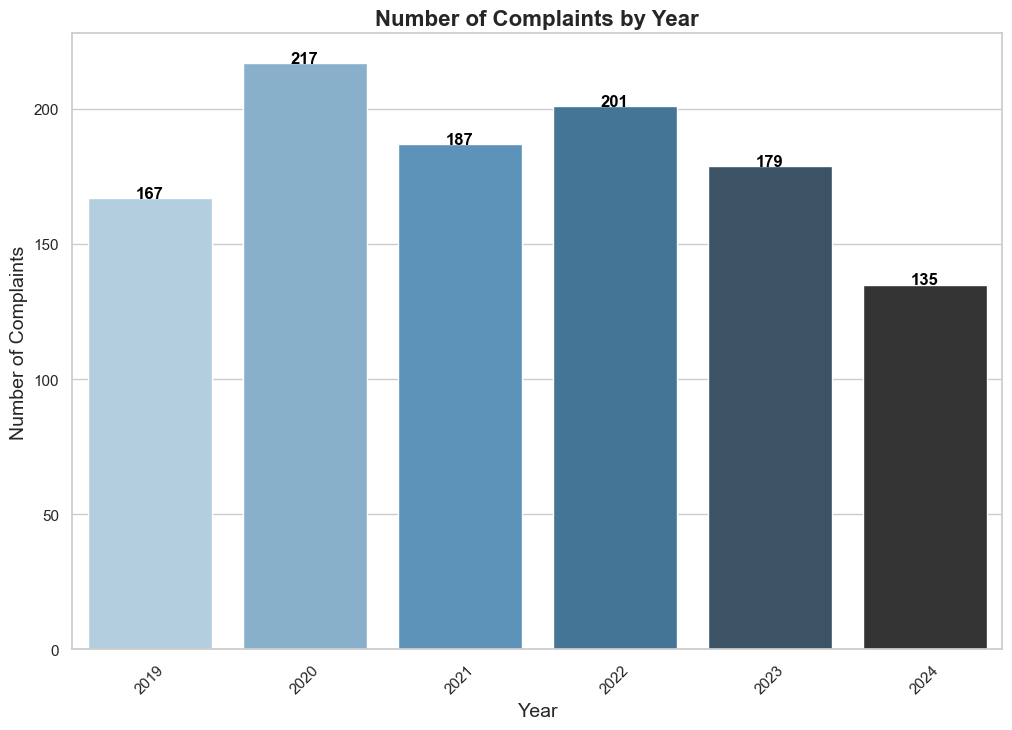

In [39]:
# Plot Complaints by Year

# Set the style to a professional and clean design
sns.set(style="whitegrid")

# Create the figure and axis objects
plt.figure(figsize=(12, 8))

# Plot the data using a countplot
ax = sns.countplot(x='Complaint Receipt Year', hue='Complaint Receipt Year', data=df_combined, palette='Blues_d', legend=False)

# Add title and labels with professional formatting
plt.title('Number of Complaints by Year', fontsize=16, fontweight='bold')
plt.xlabel('Year', fontsize=14)
plt.ylabel('Number of Complaints', fontsize=14)

# Rotate the x-ticks for better readability
plt.xticks(rotation=45)

# Add the exact value on top of each bar
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='baseline', 
                fontsize=12, color='black', fontweight='bold')

# Show the plot
plt.show()

#### Count Plot for Complaints by Month

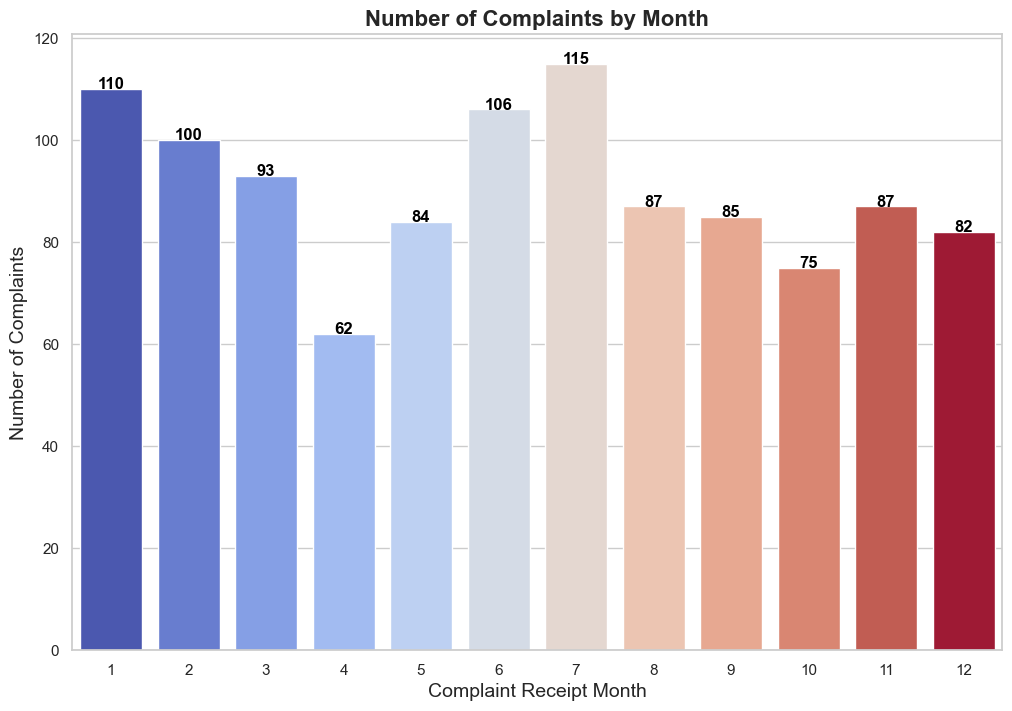

In [40]:
# Count Plot for Complaints by Month

# Set the style to a professional and clean design
sns.set(style="whitegrid")

# Create the figure and axis objects
plt.figure(figsize=(12, 8))

# Plot the data using a countplot
ax = sns.countplot(x='Complaint Receipt Month', data=df_combined, palette='coolwarm', hue='Complaint Receipt Month', legend=False)

# Add title and labels with professional formatting
plt.title('Number of Complaints by Month', fontsize=16, fontweight='bold')
plt.xlabel('Complaint Receipt Month', fontsize=14)
plt.ylabel('Number of Complaints', fontsize=14)

# Rotate the x-ticks for better readability
plt.xticks(rotation=0)

# Add the exact value on top of each bar
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='baseline', 
                fontsize=12, color='black', fontweight='bold')

# Show the plot
plt.show()

#### Box Plot for Minimum, Average, and Maximum Days of Treatment by Month

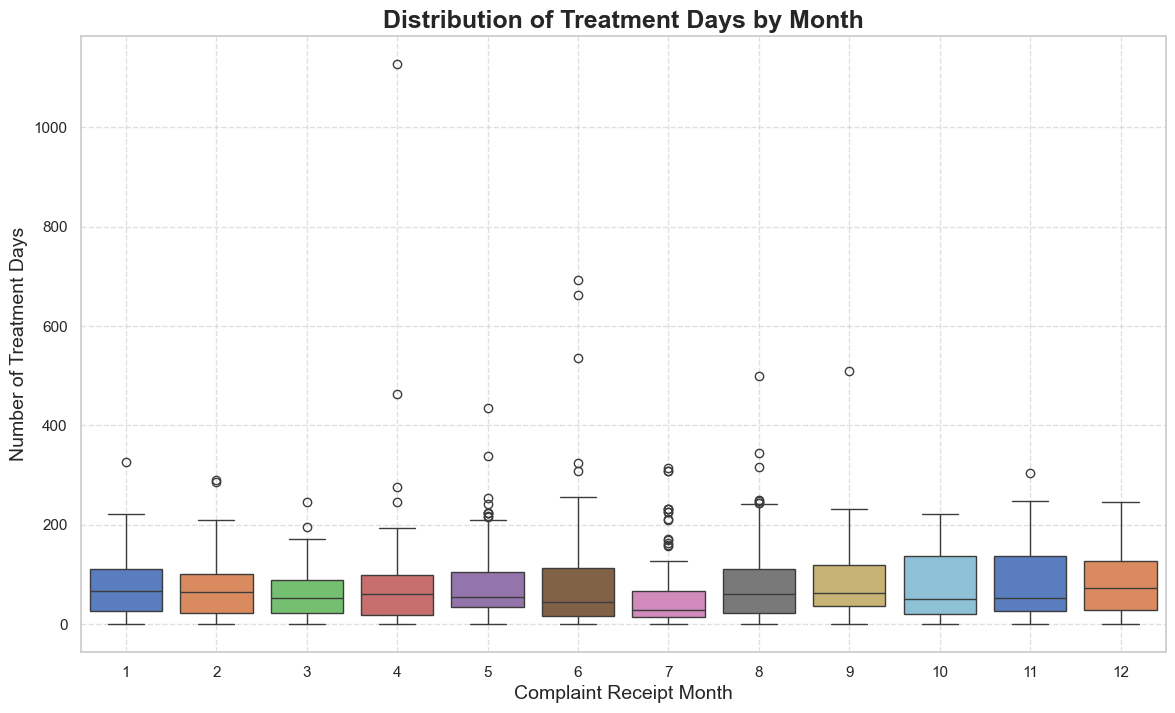

In [41]:
# Plot min, avg, max days of treatment by month

# Set the style to a professional and clean design
sns.set(style="whitegrid")

# Create the figure and axis objects
plt.figure(figsize=(14, 8))

# Plot the data using a boxplot
ax = sns.boxplot(x='Complaint Receipt Month', y='Number of Treatment Days', hue='Complaint Receipt Month', data=df_combined, palette='muted', legend=False)

# Add title and labels with professional formatting
plt.title('Distribution of Treatment Days by Month', fontsize=18, fontweight='bold')
plt.xlabel('Complaint Receipt Month', fontsize=14)
plt.ylabel('Number of Treatment Days', fontsize=14)

# Optionally, add a grid to improve readability
plt.grid(True, linestyle='--', alpha=0.6)

# Show the plot
plt.show()

In [42]:
# Entry with max Number of Treatment Days
df_combined[df_combined['Number of Treatment Days']==df_combined['Number of Treatment Days'].max()]

,_id,Complaint Number,Channel of Receipt,Initial Request Date for Information,Complaint Subject,Complaint Receipt Date,Entity Complained Against,Closing Date,Decision,Number of Treatment Days,Status,Complainant Type,Freedom of Information Request Subject,Complaint Receipt Year,Complaint Receipt Month,Initial Response Days,Justified
466,467,191/21,Email,2021-04-18,Lack of Justification,2021-04-26,בית חולים אסף הרופא,2024-05-27,Partially Justified,1127.0,Treatment Completed,אזרח,בדיקה בדיקה,2021,4,8,0


In [43]:
# Investigate entry with max treatment days

id_max_days_treatment = pd.to_numeric(df_combined[df_combined['Number of Treatment Days']==df_combined['Number of Treatment Days'].max()]['_id'].values[0])

max_days_treatment = df_combined.loc[id_max_days_treatment,'Number of Treatment Days']

print(f'The entry with the longest treatment days is id: {id_max_days_treatment}')
print(f'The treatment was {max_days_treatment} days')

The entry with the longest treatment days is id: 467
The treatment was 276.0 days


#### Box Plot for Minimum, Average, and Maximum Days of Treatment by Year

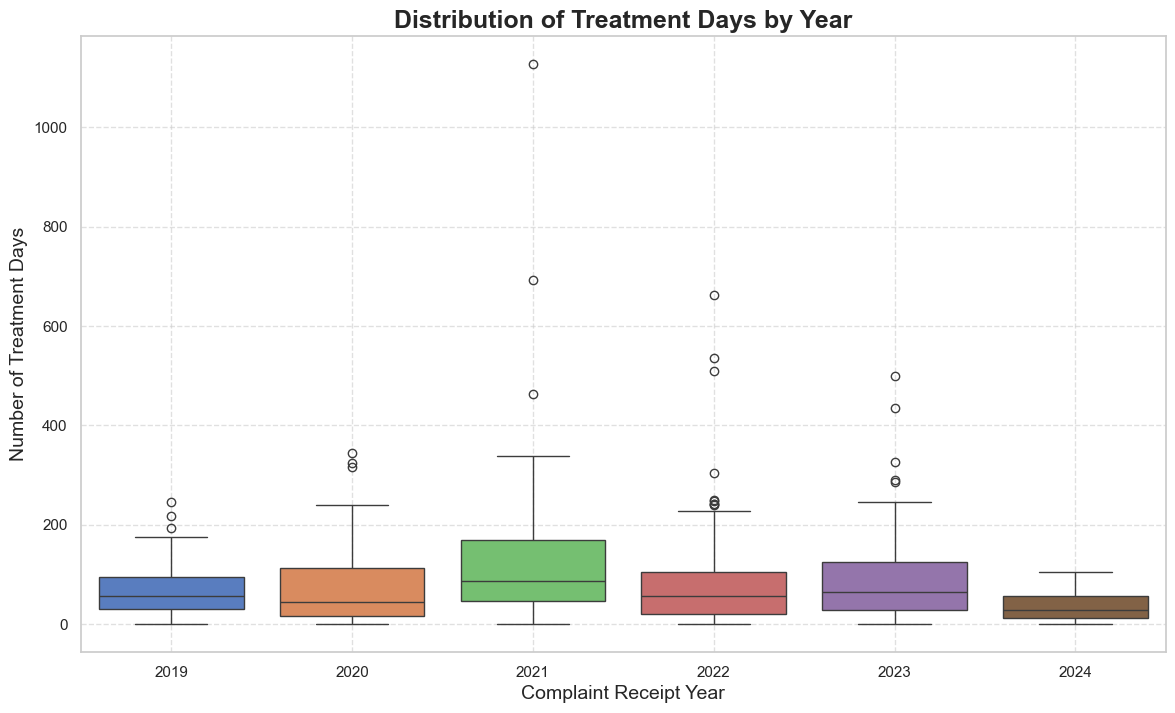

In [44]:
# 
# Set the style to a professional and clean design
sns.set(style="whitegrid")

# Create the figure and axis objects
plt.figure(figsize=(14, 8))

# Plot the data using a boxplot
ax = sns.boxplot(x='Complaint Receipt Year', y='Number of Treatment Days', hue='Complaint Receipt Year', data=df_combined, palette='muted', legend=False)

# Add title and labels with professional formatting
plt.title('Distribution of Treatment Days by Year', fontsize=18, fontweight='bold')
plt.xlabel('Complaint Receipt Year', fontsize=14)
plt.ylabel('Number of Treatment Days', fontsize=14)

# Optionally, add a grid to improve readability
plt.grid(True, linestyle='--', alpha=0.6)

# Show the plot
plt.show()

#### Number of Complaints by Status

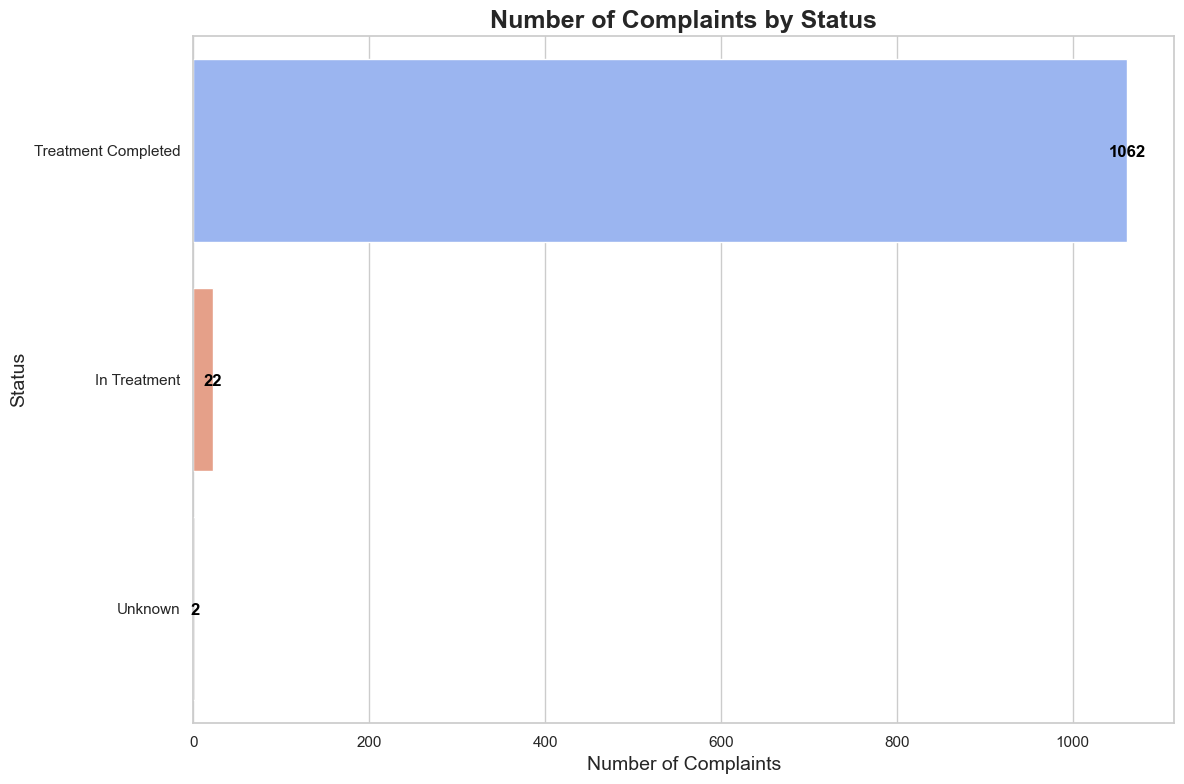

In [45]:
# Number of Complaints by Status

# Set the style to a professional and clean design
sns.set(style="whitegrid")

# Create the figure and axis objects
plt.figure(figsize=(12, 8))

# Plot the data using a countplot
ax = sns.countplot(y='Status', 
                   data=df_combined, 
                   order=df_combined['Status'].value_counts().index, 
                   palette='coolwarm', 
                   legend=False, 
                   hue='Status')

# Add titles and labels
plt.title('Number of Complaints by Status', fontsize=18, fontweight='bold')
plt.xlabel('Number of Complaints', fontsize=14)
plt.ylabel('Status', fontsize=14)

# Add data labels to each bar
for p in ax.patches:
    ax.annotate(f'{int(p.get_width())}', 
                (p.get_width() + 0.5, p.get_y() + p.get_height() / 2),
                ha='center', va='center_baseline', 
                fontsize=12, color='black', fontweight='bold')

# Adjust layout for better readability
plt.tight_layout()

# Show the plot
plt.show()

In [46]:
# Percentages of each status calculation

# Calculate the total number of complaints
total_complaints = df_combined['Status'].count()

# Calculate the count of each status
status_counts = df_combined['Status'].value_counts()

# Calculate the percentage of each status
status_percentages = (status_counts / total_complaints) * 100

# Display the percentages
print("Percentages of each status:")
print(status_percentages)

Percentages of each status:
Status
Treatment Completed    97.790055
In Treatment            2.025783
Unknown                 0.184162
Name: count, dtype: float64


#### Number of Complaints by Decision

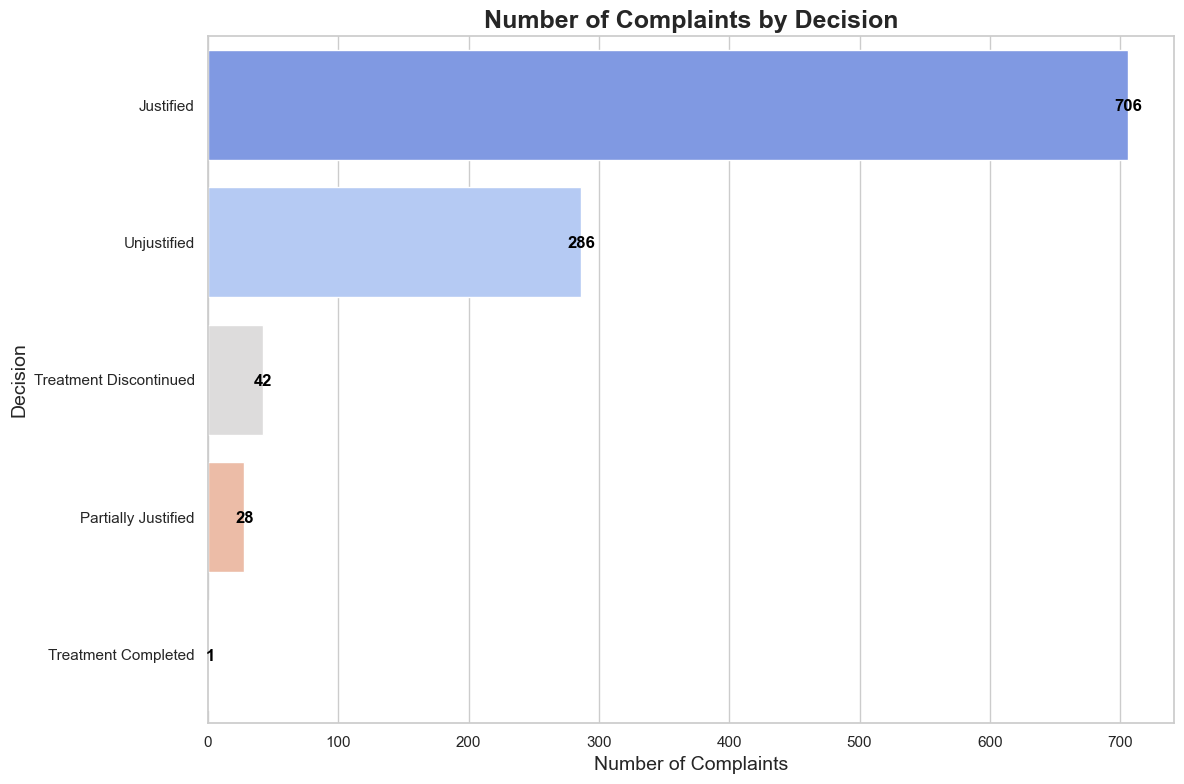

In [47]:
# Number of Complaints by Decision

# Set the style to a professional and clean design
sns.set(style="whitegrid")

# Create the figure and axis objects
plt.figure(figsize=(12, 8))

# Plot the data using a countplot
ax = sns.countplot(y='Decision', 
                   data=df_combined, 
                   order=df_combined['Decision'].value_counts().index, 
                   palette='coolwarm', 
                   legend=False, 
                   hue='Decision')

# Add titles and labels
plt.title('Number of Complaints by Decision', fontsize=18, fontweight='bold')
plt.xlabel('Number of Complaints', fontsize=14)
plt.ylabel('Decision', fontsize=14)

# Add data labels to each bar
for p in ax.patches:
    ax.annotate(f'{int(p.get_width())}', 
                (p.get_width() + 0.5, p.get_y() + p.get_height() / 2),
                ha='center', va='center_baseline', 
                fontsize=12, color='black', fontweight='bold')

# Adjust layout for better readability
plt.tight_layout()

# Show the plot
plt.show()

In [48]:
# Percentages of each Decision calculation

# Calculate the total number of complaints
total_complaints = df_combined['Decision'].count()

# Calculate the count of each status
decision_counts = df_combined['Decision'].value_counts()

# Calculate the percentage of each status
decision_percentages = (decision_counts / total_complaints) * 100

# Display the percentages
print("Percentages of each Decision:")
print(decision_percentages)

Percentages of each Decision:
Decision
Justified                 66.415804
Unjustified               26.904986
Treatment Discontinued     3.951082
Partially Justified        2.634055
Treatment Completed        0.094073
Name: count, dtype: float64


#### Number of Complaints by Decision and Year

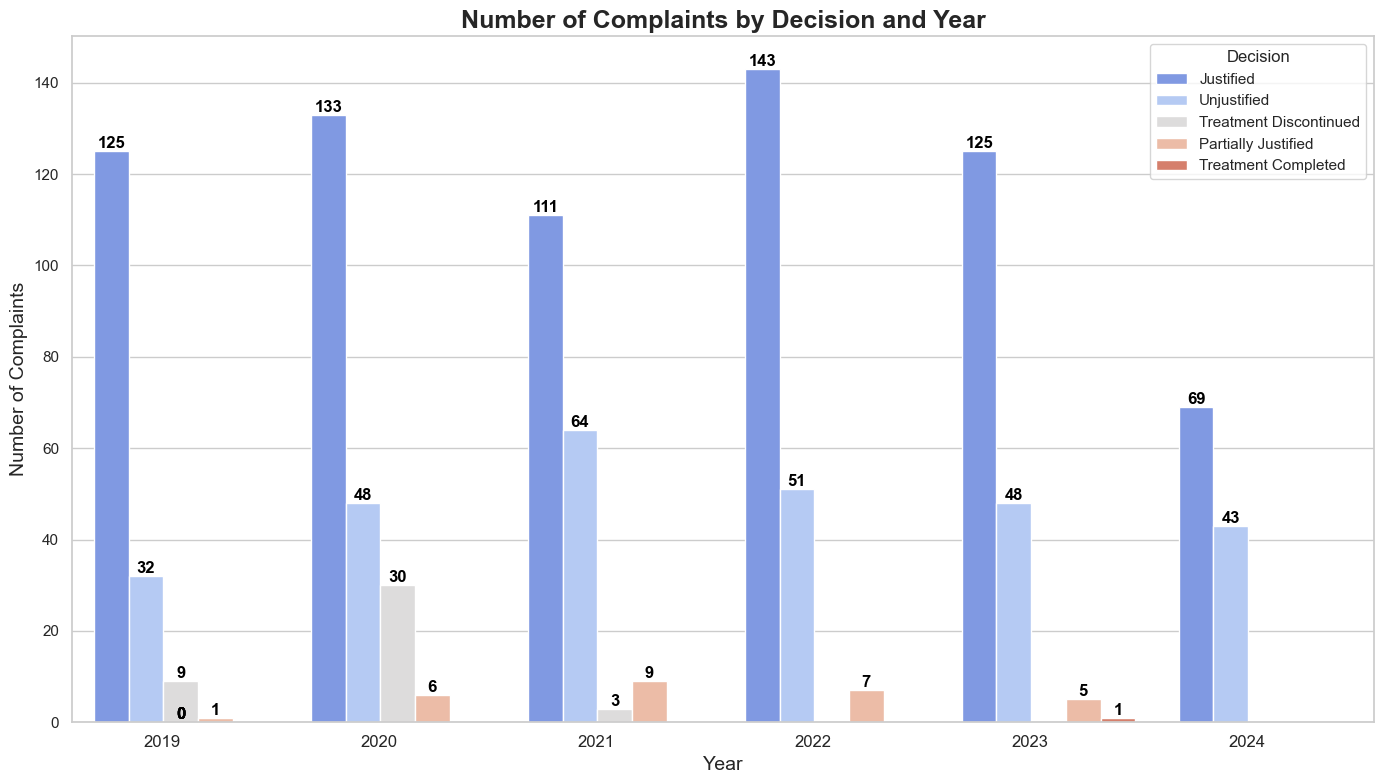

In [49]:
# Number of Complaints by Decision and Year

# Set the style to a professional and clean design
sns.set(style="whitegrid")

# Create the figure and axis objects
plt.figure(figsize=(14, 8))

# Plot the data using a countplot
ax = sns.countplot(x='Complaint Receipt Year', 
                   hue='Decision', 
                   data=df_combined, 
                   palette='coolwarm')

# Add titles and labels
plt.title('Number of Complaints by Decision and Year', fontsize=18, fontweight='bold')
plt.xlabel('Year', fontsize=14)
plt.ylabel('Number of Complaints', fontsize=14)

# Add data labels to each bar
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom', 
                fontsize=12, color='black', fontweight='bold')

# Rotate the x-ticks for better readability
plt.xticks(rotation=0, ha='right', fontsize=12)

# Adjust layout for better readability
plt.tight_layout()

# Show the plot
plt.show()

##### Average Time to Decision by Year

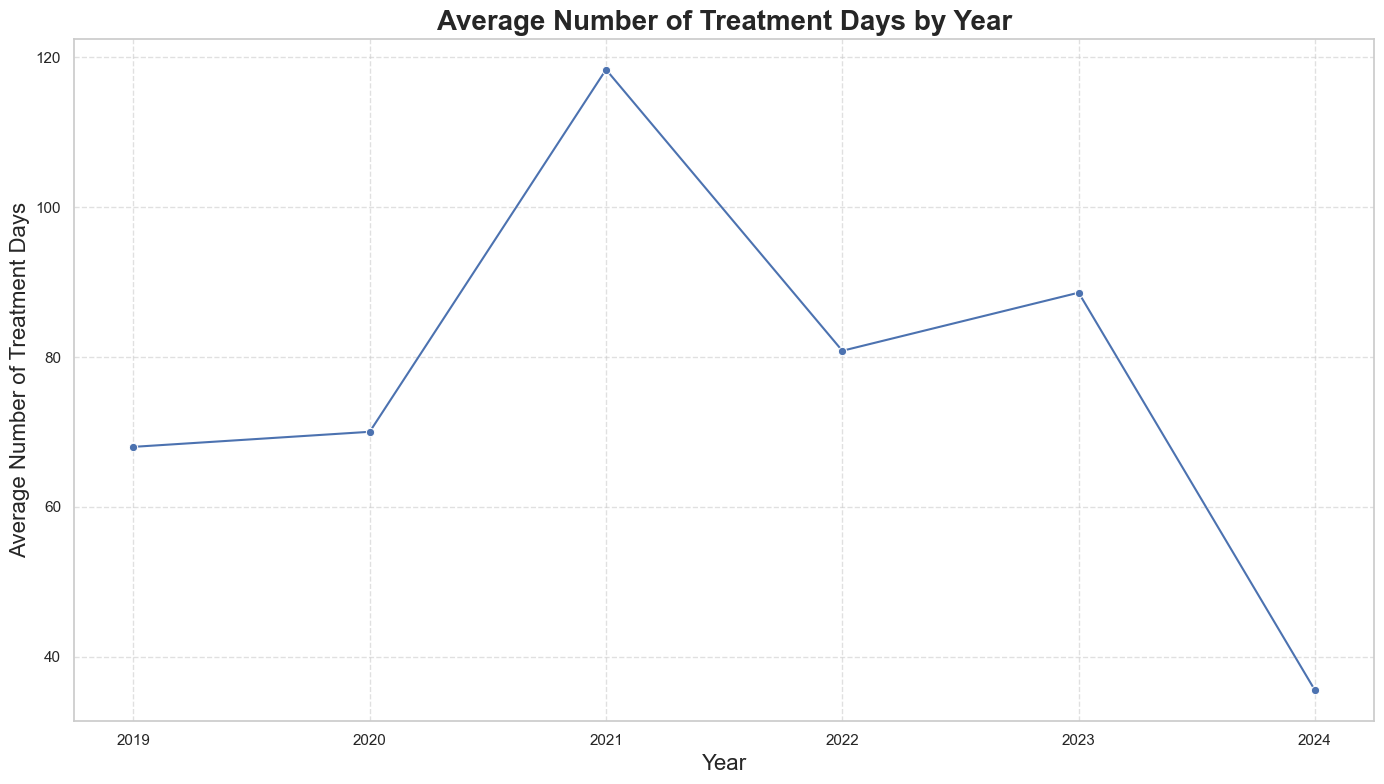

In [50]:
# Average Time to Decision by Year

# Calculate the average number of treatment days by year
avg_treatment_year = df_combined.groupby('Complaint Receipt Year')['Number of Treatment Days'].mean()

# Plot the average number of treatment days by year
plt.figure(figsize=(14, 8))
sns.lineplot(x=avg_treatment_year.index, y=avg_treatment_year.values, marker='o', color='b')

# Add titles and labels
plt.title('Average Number of Treatment Days by Year', fontsize=20, fontweight='bold')
plt.xlabel('Year', fontsize=16)
plt.ylabel('Average Number of Treatment Days', fontsize=16)

plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


#### Line Plot for complaints over time, aggregated by month

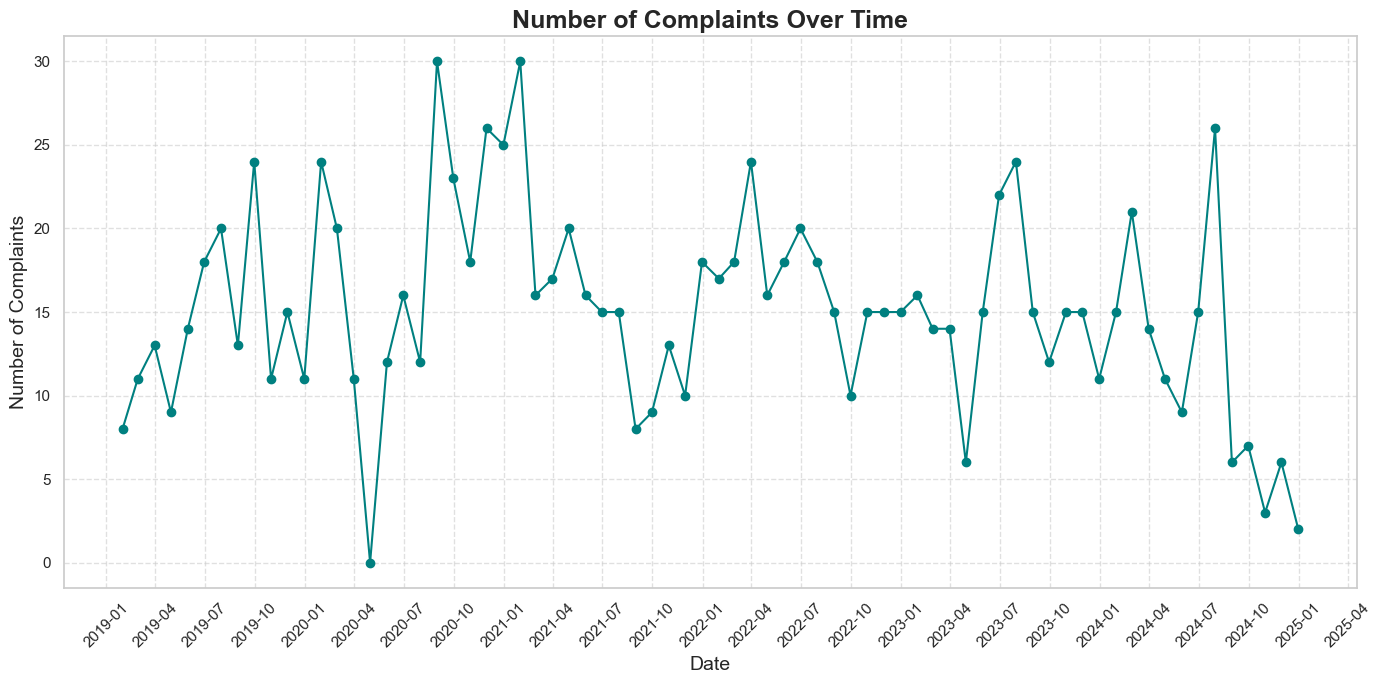

In [51]:
# Line Plot for complaints over time, aggregated by month

# Group by month and count the number of complaints
complaints_over_time = df_combined.resample('ME', on='Complaint Receipt Date').size()

# Set the style to a professional and clean design
sns.set(style="whitegrid")

# Create the figure and axis objects
plt.figure(figsize=(14, 7))

# Plot the time series of complaints
plt.plot(complaints_over_time.index, complaints_over_time.values, marker='o', linestyle='-', color='teal')

# Add titles and labels with professional formatting
plt.title('Number of Complaints Over Time', fontsize=18, fontweight='bold')
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Complaints', fontsize=14)

# Improve the x-axis date format
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=3))
plt.xticks(rotation=45)

# Add grid for better readability
plt.grid(True, linestyle='--', alpha=0.6)

# Show the plot
plt.tight_layout()
plt.show()

#### Count plot with the complaint subjects

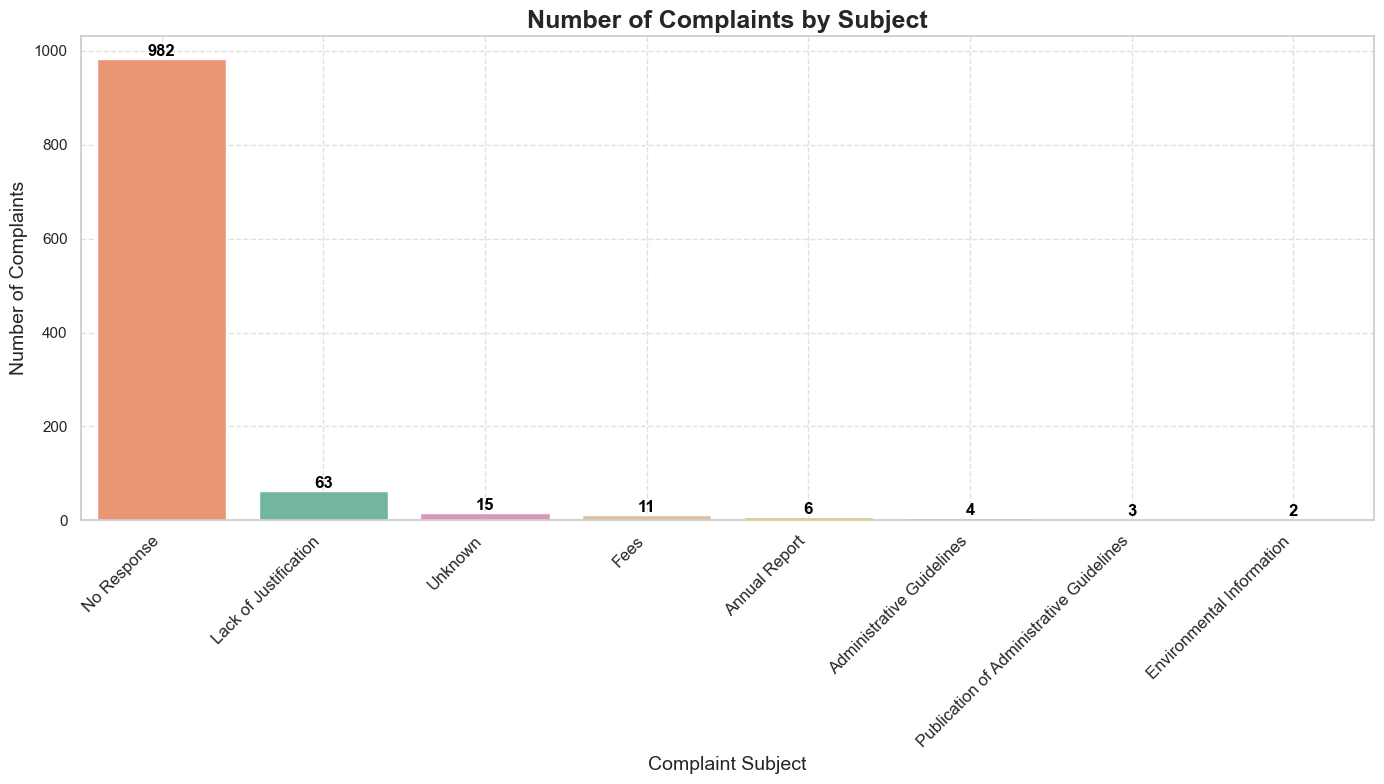

In [52]:
# Count plot with the complaint subjects

# Set the style to a professional and clean design
sns.set(style="whitegrid")

# Create the figure and axis objects
plt.figure(figsize=(14, 8))

# Plot the data using a countplot
ax = sns.countplot(x='Complaint Subject', data=df_combined, palette='Set2', 
                   order=df_combined['Complaint Subject'].value_counts().index,
                   hue = 'Complaint Subject', legend = False)

# Add title and labels with professional formatting
plt.title('Number of Complaints by Subject', fontsize=18, fontweight='bold')
plt.xlabel('Complaint Subject', fontsize=14)
plt.ylabel('Number of Complaints', fontsize=14)

# Rotate the x-ticks for better readability
plt.xticks(rotation=45, ha='right', fontsize=12)

# Add the values on top of each bar
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom', 
                fontsize=12, color='black', fontweight='bold')

# Add grid lines for better readability
plt.grid(True, linestyle='--', alpha=0.6)

# Adjust the layout to prevent label overlap
plt.tight_layout()

# Show the plot
plt.show()

#### Number of Complaints by Year, Categorized by Complaint Subject

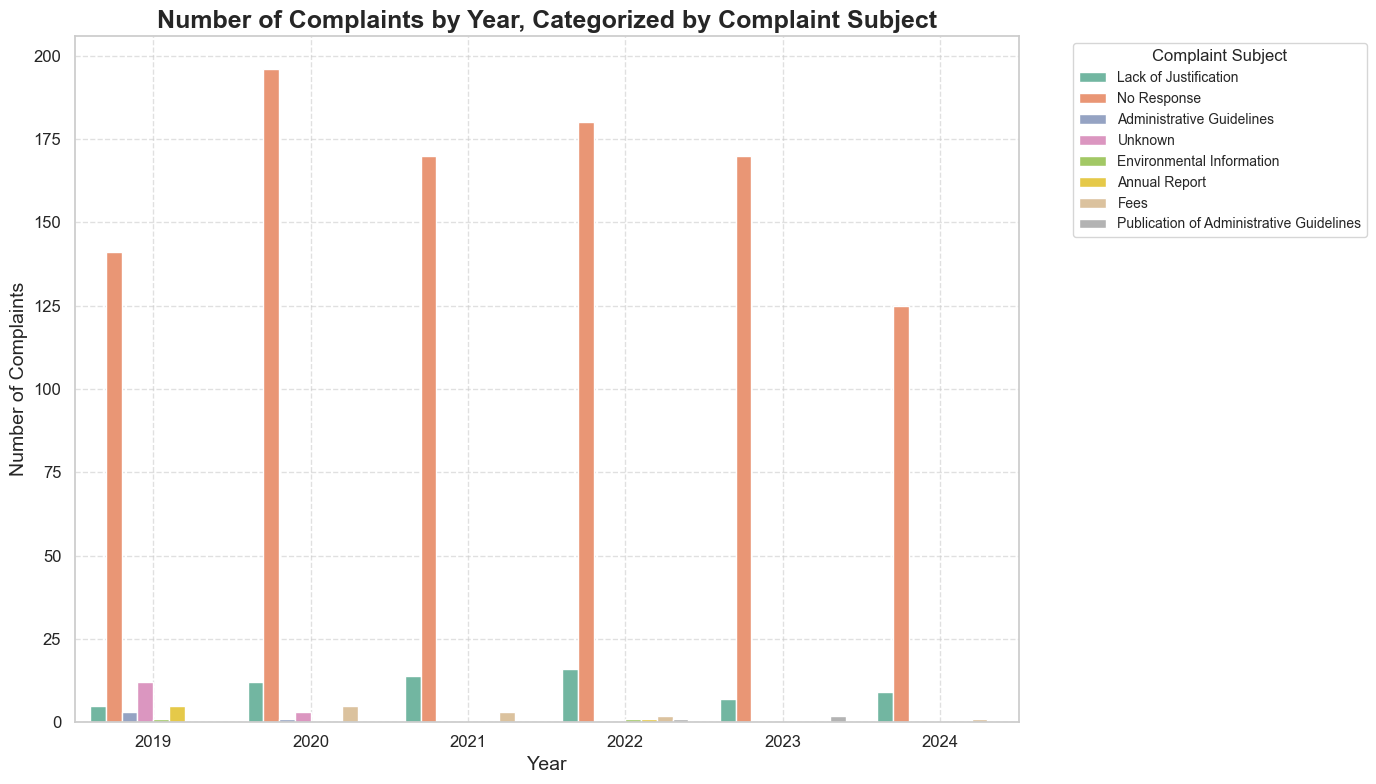

In [53]:
# Number of Complaints by Year, Categorized by Complaint Subject

# Set the style to a professional and clean design
sns.set(style="whitegrid")

# Create the figure and axis objects
plt.figure(figsize=(14, 8))

# Plot the data using a countplot
ax = sns.countplot(x='Complaint Receipt Year', hue='Complaint Subject', data=df_combined, palette='Set2')

# Add title and labels with professional formatting
plt.title('Number of Complaints by Year, Categorized by Complaint Subject', fontsize=18, fontweight='bold')
plt.xlabel('Year', fontsize=14)
plt.ylabel('Number of Complaints', fontsize=14)

# Rotate the x-ticks for better readability
plt.xticks(rotation=0, fontsize=12)
plt.yticks(fontsize=12)

# Move the legend outside the plot
plt.legend(title='Complaint Subject', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)

# Add grid lines for better readability
plt.grid(True, linestyle='--', alpha=0.6)

# Adjust the layout to make room for the legend
plt.tight_layout()

# Show the plot
plt.show()

#### Average Number of Treatment Days by Complaint Subject

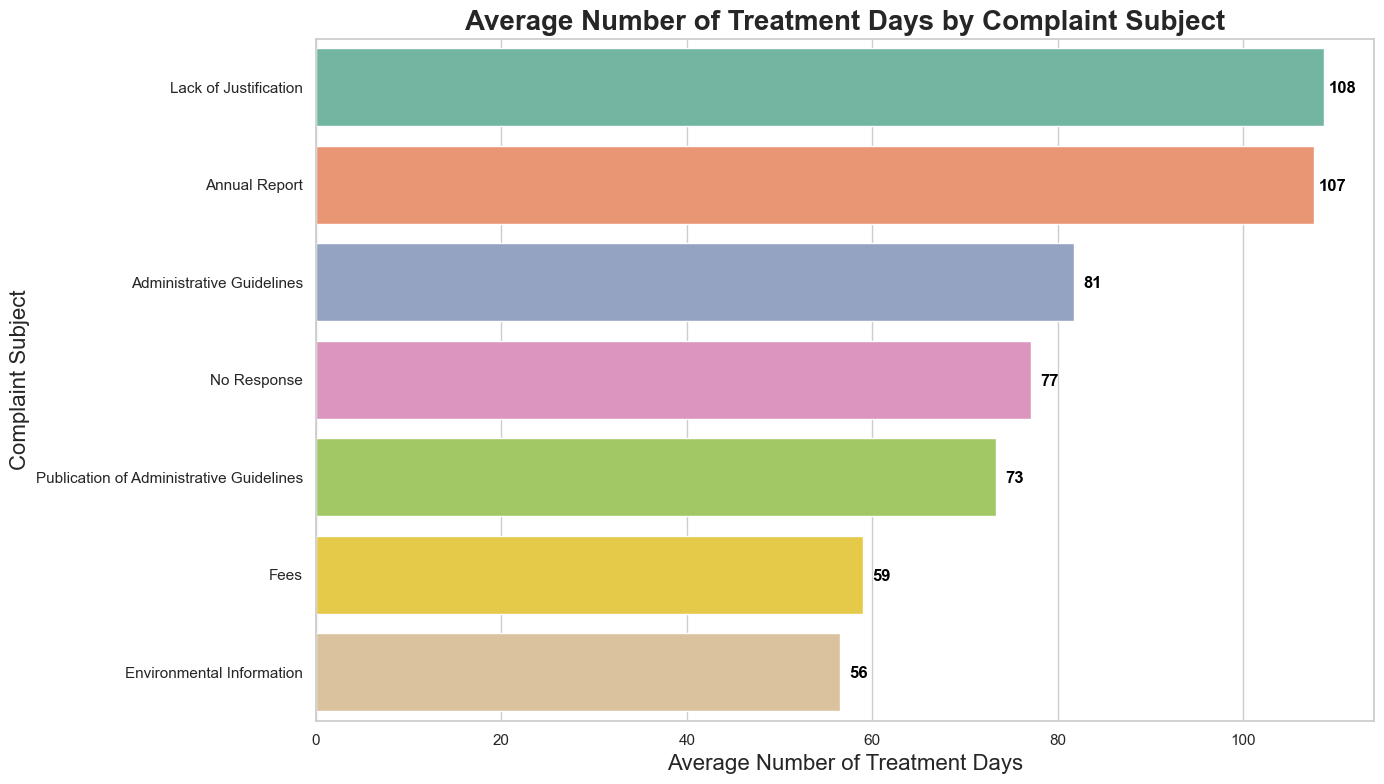

In [54]:
# Average Number of Treatment Days by Complaint Subject

# Exclude rows where Complaint Subject is 'Unknown'
filtered_df = df_combined[df_combined['Complaint Subject'] != 'Unknown']

# Calculate the average number of treatment days by complaint subject
avg_treatment_subject = filtered_df.groupby('Complaint Subject')['Number of Treatment Days'].mean().sort_values(ascending=False)

# Plot the average number of treatment days by complaint subject
plt.figure(figsize=(14, 8))
ax = sns.barplot(x=avg_treatment_subject.values, y=avg_treatment_subject.index, hue=avg_treatment_subject.index, palette='Set2', legend=False)

# Add the exact average number of treatment days on top of each bar
for p in ax.patches:
    ax.annotate(f'{int(p.get_width())}', 
                (p.get_width() + 2, p.get_y() + p.get_height() / 2), 
                ha='center', va='center_baseline', 
                fontsize=12, color='black', fontweight='bold')
    
# Add titles and labels
plt.title('Average Number of Treatment Days by Complaint Subject', fontsize=20, fontweight='bold')
plt.xlabel('Average Number of Treatment Days', fontsize=16)
plt.ylabel('Complaint Subject', fontsize=16)

plt.tight_layout()
plt.show()


##### Trends in Complaint Subjects Over Time

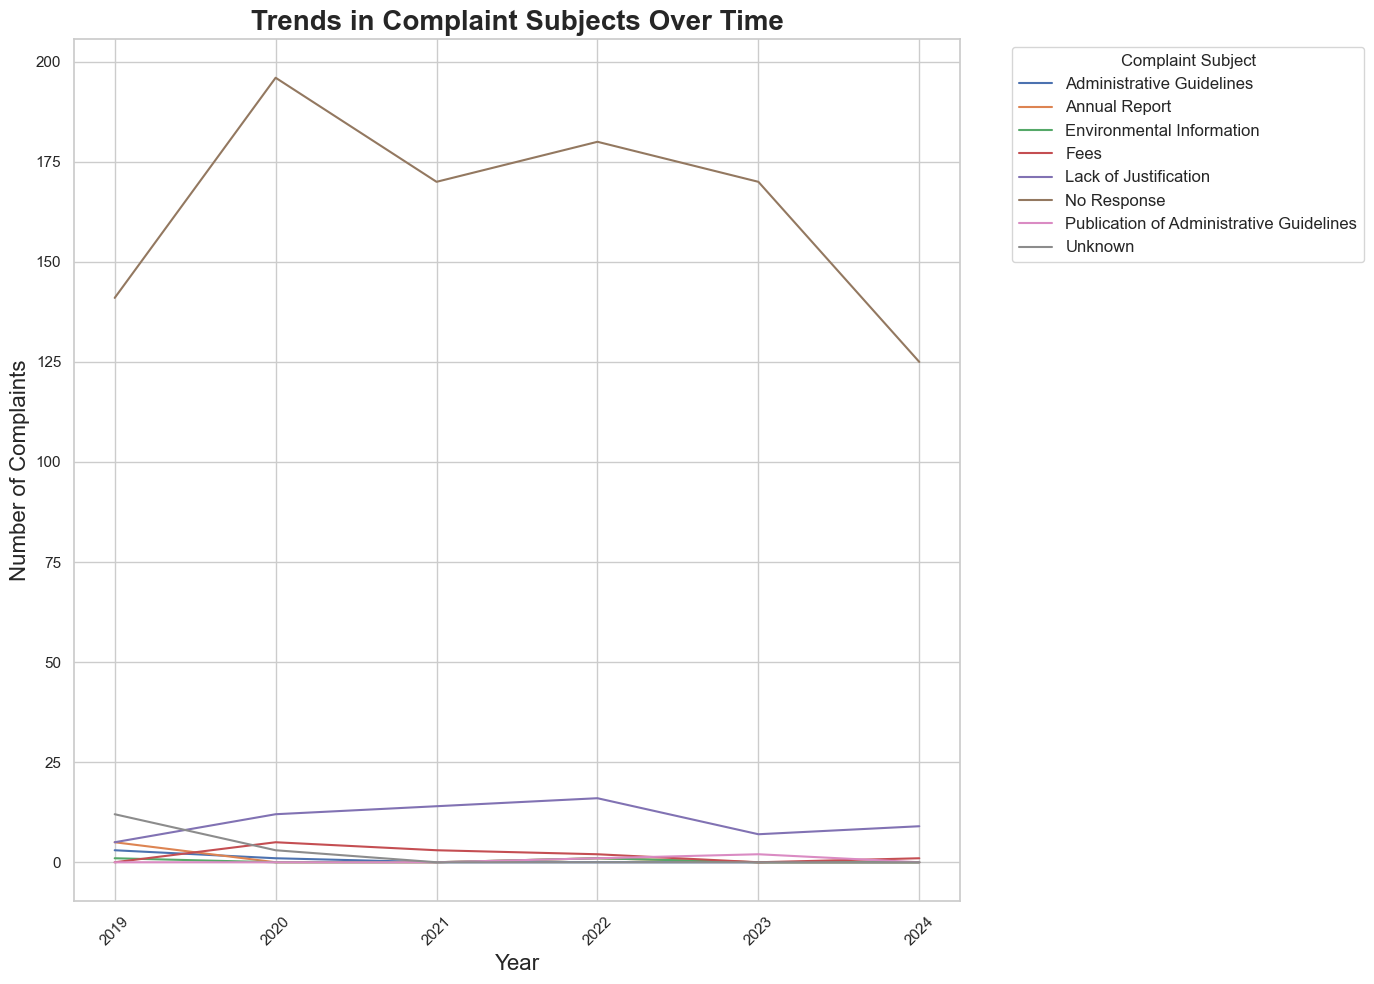

In [55]:
# Trends in Complaint Subjects Over Time

# Group data by year and complaint subject, and count the number of complaints
complaints_by_subject_year = df_combined.groupby(['Complaint Receipt Year', 'Complaint Subject']).size().reset_index(name='Complaint Count')

# Pivot the table to get years as columns and complaint subjects as rows
complaints_pivot = complaints_by_subject_year.pivot(index='Complaint Subject', columns='Complaint Receipt Year', values='Complaint Count').fillna(0)

# Set up the plot
plt.figure(figsize=(14, 10))

# Plot each complaint subject's trend over time
sns.lineplot(data=complaints_pivot.T, dashes=False)

# Add title and labels with professional formatting
plt.title('Trends in Complaint Subjects Over Time', fontsize=20, fontweight='bold')
plt.xlabel('Year', fontsize=16)
plt.ylabel('Number of Complaints', fontsize=16)

# Customize legend for better readability
plt.legend(title='Complaint Subject', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12)

# Rotate the x-ticks for better readability
plt.xticks(rotation=45)

# Adjust layout for better readability
plt.tight_layout()

# Show the plot
plt.show()

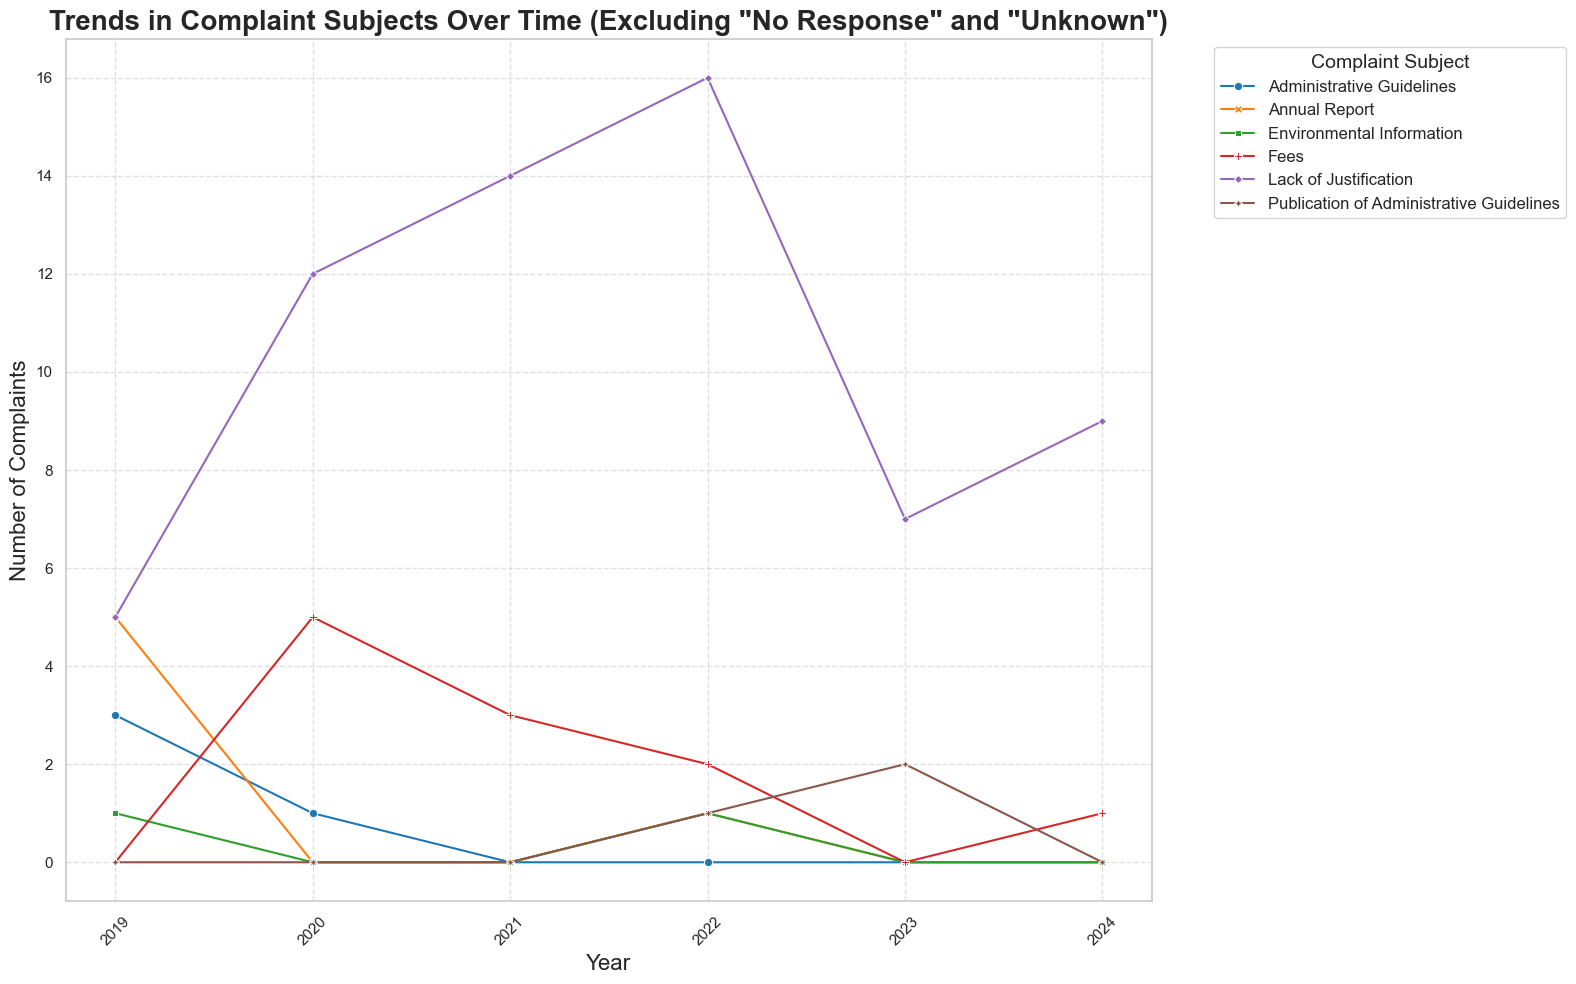

In [56]:
# Trends in Complaint Subjects Over Time (Excluding 'No Response' and 'Unknown')

# Filter out 'No Response' and 'Unknown' from the dataset
filtered_df = df_combined[~df_combined['Complaint Subject'].isin(['No Response', 'Unknown'])]

# Group data by year and complaint subject, and count the number of complaints
complaints_by_subject_year = filtered_df.groupby(['Complaint Receipt Year', 'Complaint Subject']).size().reset_index(name='Complaint Count')

# Pivot the table to get years as columns and complaint subjects as rows
complaints_pivot = complaints_by_subject_year.pivot(index='Complaint Subject', columns='Complaint Receipt Year', values='Complaint Count').fillna(0)

# Set up the plot
plt.figure(figsize=(16, 10))

# Plot each complaint subject's trend over time
sns.lineplot(data=complaints_pivot.T, dashes=False, markers=True, palette="tab10")

# Add title and labels with professional formatting
plt.title('Trends in Complaint Subjects Over Time (Excluding "No Response" and "Unknown")', fontsize=20, fontweight='bold')
plt.xlabel('Year', fontsize=16)
plt.ylabel('Number of Complaints', fontsize=16)

# Customize legend for better readability
plt.legend(title='Complaint Subject', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12, title_fontsize=14)

# Adjust the grid for better readability
plt.grid(True, linestyle='--', alpha=0.6)

# Rotate the x-ticks for better readability
plt.xticks(rotation=45)

# Adjust layout for better readability
plt.tight_layout()

# Show the plot
plt.show()

#### Distribution of Initial Response Days by Year

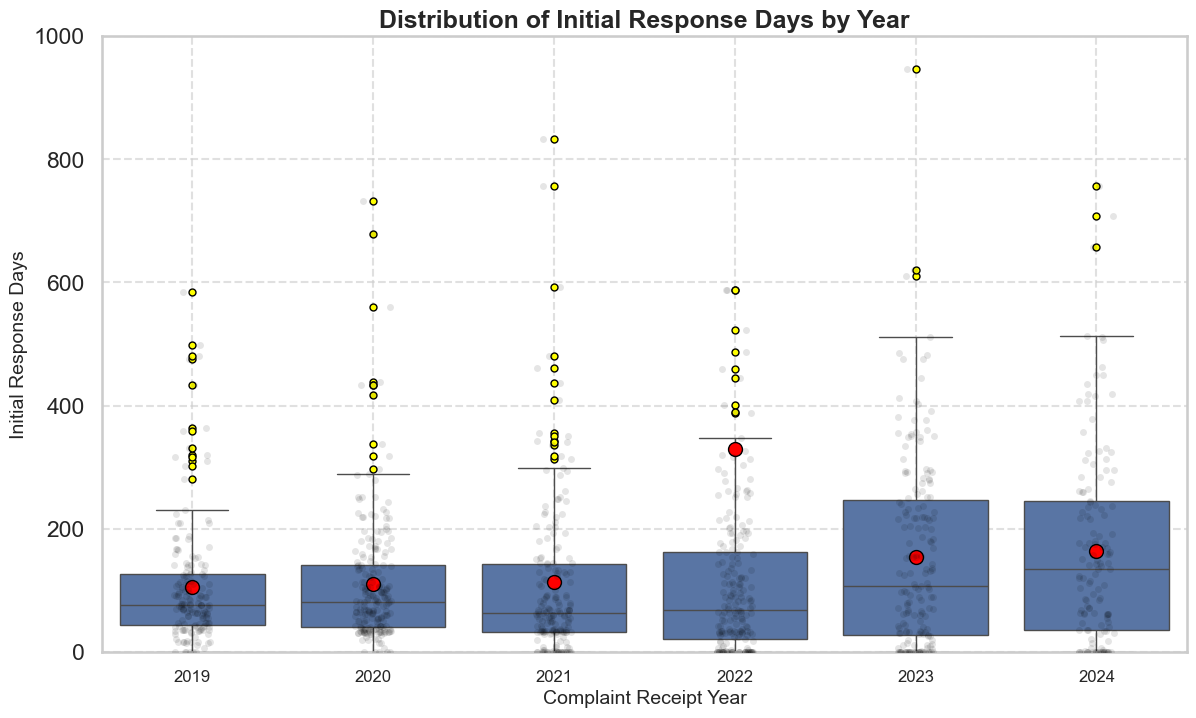

In [57]:
# Distribution of Initial Response Days by Year

# Set a style and context for the plot to improve its aesthetics
sns.set(style="whitegrid", context="talk")

plt.figure(figsize=(14, 8))

# Create the box plot with more descriptive elements
sns.boxplot(
    x='Complaint Receipt Year',
    y='Initial Response Days',
    data=df_combined,
    showmeans=True,
    meanprops={"marker": "o", "markerfacecolor": "red", "markeredgecolor": "black", "markersize": "10"},
    flierprops={"marker": "o", "markerfacecolor": "yellow", "markeredgecolor": "black", "markersize": "5"}
)

# Highlight the mean and add data points over the box plot for more detail
sns.stripplot(
    x='Complaint Receipt Year',
    y='Initial Response Days',
    data=df_combined,
    jitter=True,
    dodge=True,
    alpha=0.1,
    color='black'
)

# Adding a title and labels with more detail and improved readability
plt.title('Distribution of Initial Response Days by Year', fontsize=18, weight='bold')
plt.xlabel('Complaint Receipt Year', fontsize=14)
plt.ylabel('Initial Response Days', fontsize=14)

# Improving y-axis limit based on the observed data
plt.ylim(0, 1000) 

# Ensure x-axis labels are readable
plt.xticks(rotation=0, fontsize=12)

# Adding a grid for better visual separation of data points
plt.grid(True, linestyle='--', alpha=0.6)

# Show the plot
plt.show()

#### Distribution of Initial Response Days by Month

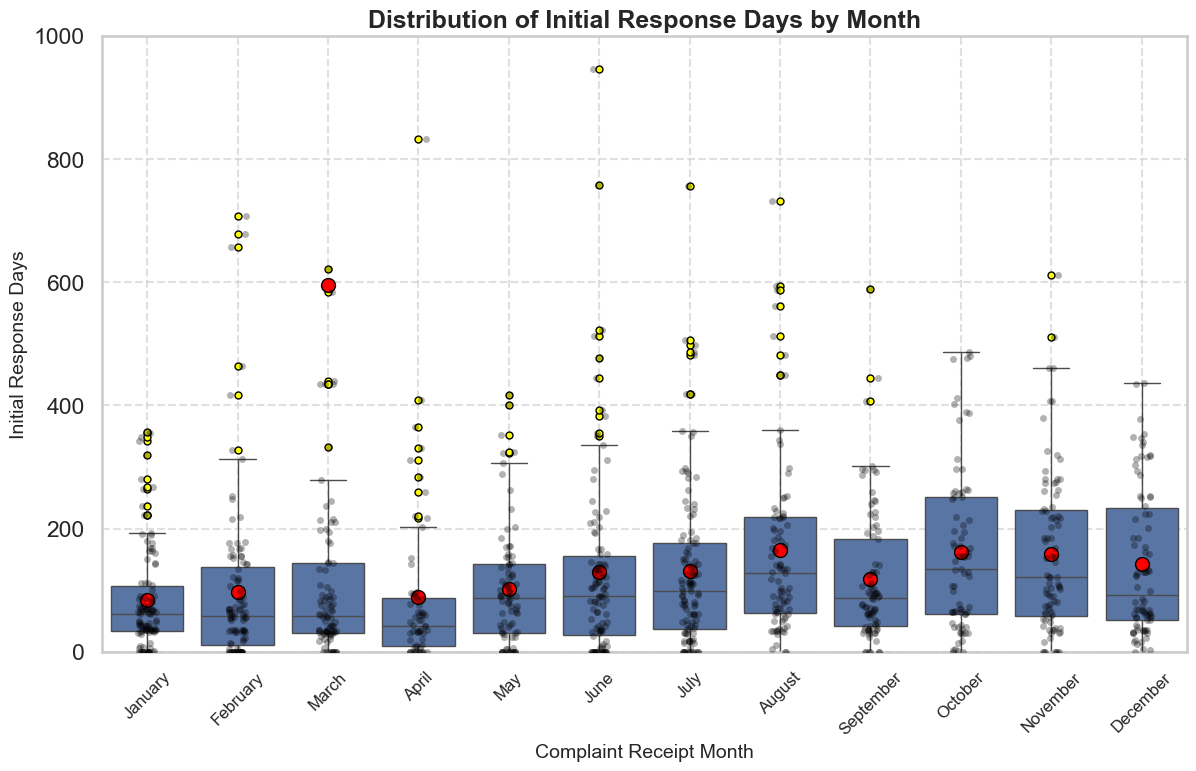

In [58]:
# Distribution of Initial Response Days by Year

# Set a style and context for the plot to improve its aesthetics
sns.set(style="whitegrid", context="talk")

# Convert 'Complaint Receipt Date' to datetime if not already done, and extract the month
df_combined['Complaint Receipt Month'] = df_combined['Complaint Receipt Date'].dt.strftime('%B')

# Sort the months to ensure they appear in chronological order
month_order = [
    'January', 'February', 'March', 'April', 'May', 'June', 
    'July', 'August', 'September', 'October', 'November', 'December'
]

plt.figure(figsize=(14, 8))

# Create the box plot with more descriptive elements
sns.boxplot(
    x='Complaint Receipt Month',
    y='Initial Response Days',
    data=df_combined,
    showmeans=True,
    order=month_order,
    meanprops={"marker": "o", "markerfacecolor": "red", "markeredgecolor": "black", "markersize": "10"},
    flierprops={"marker": "o", "markerfacecolor": "yellow", "markeredgecolor": "black", "markersize": "5"}
)

# Highlight the mean and add data points over the box plot for more detail
sns.stripplot(
    x='Complaint Receipt Month',
    y='Initial Response Days',
    data=df_combined,
    jitter=True,
    dodge=True,
    alpha=0.3,
    color='black',
    order=month_order
)

# Adding a title and labels with more detail and improved readability
plt.title('Distribution of Initial Response Days by Month', fontsize=18, weight='bold')
plt.xlabel('Complaint Receipt Month', fontsize=14)
plt.ylabel('Initial Response Days', fontsize=14)

# Improving y-axis limit based on the observed data
plt.ylim(0, 1000) 

# Ensure x-axis labels are readable
plt.xticks(rotation=45, fontsize=12)

# Adding a grid for better visual separation of data points
plt.grid(True, linestyle='--', alpha=0.6)

# Show the plot
plt.show()

#### Count Plot for Channel of Receipt

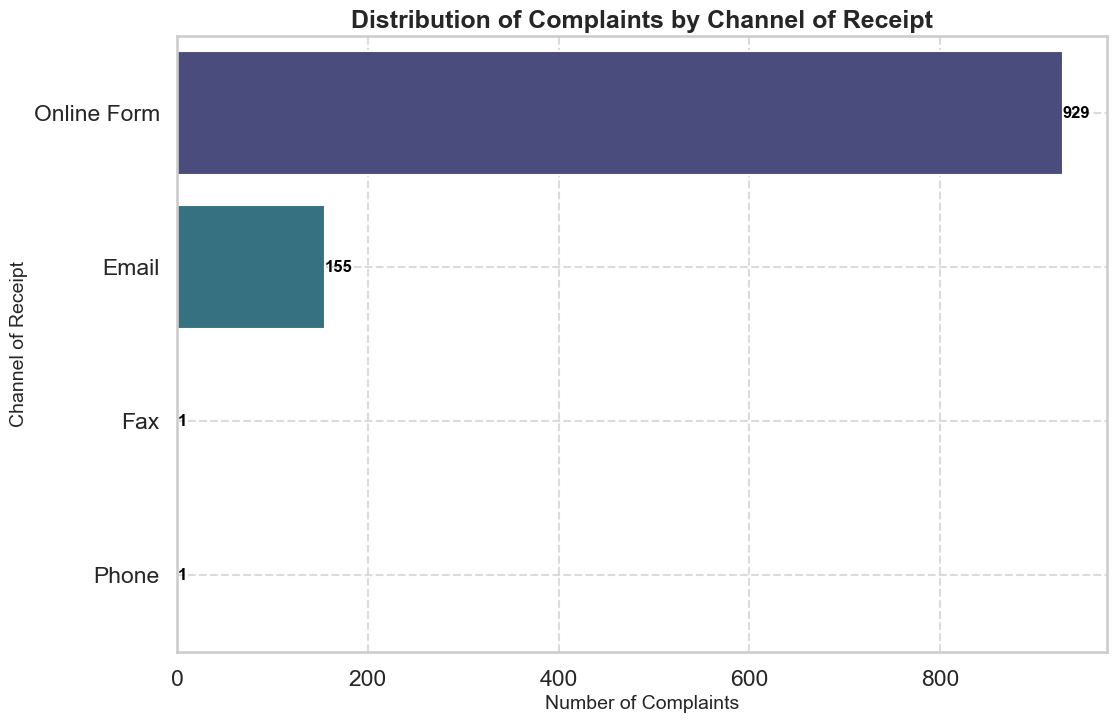

In [59]:
# Count Plot for Channel of Receipt

# Set a style and context for the plot to improve its aesthetics
sns.set(style="whitegrid", context="talk")

plt.figure(figsize=(12, 8))

# Create the count plot for 'Channel of Receipt'
sns.countplot(
    y='Channel of Receipt',  # Horizontal bar plot for better readability with longer category names
    data=df_combined,
    order=df_combined['Channel of Receipt'].value_counts().index,  # Order by frequency
    palette='viridis',
    hue='Channel of Receipt',
    legend=False
)

# Adding a title and labels with more detail and improved readability
plt.title('Distribution of Complaints by Channel of Receipt', fontsize=18, weight='bold')
plt.xlabel('Number of Complaints', fontsize=14)
plt.ylabel('Channel of Receipt', fontsize=14)

# Annotate bars with the count of complaints
for index, value in enumerate(df_combined['Channel of Receipt'].value_counts()):
    plt.text(value, index, str(value), va='center', fontsize=12, color='black', weight='bold')

# Adding a grid for better visual separation of data points
plt.grid(True, linestyle='--', alpha=0.7)

# Show the plot
plt.show()

#### Number of Complaints by Year, Categorized by Channel of Receipt

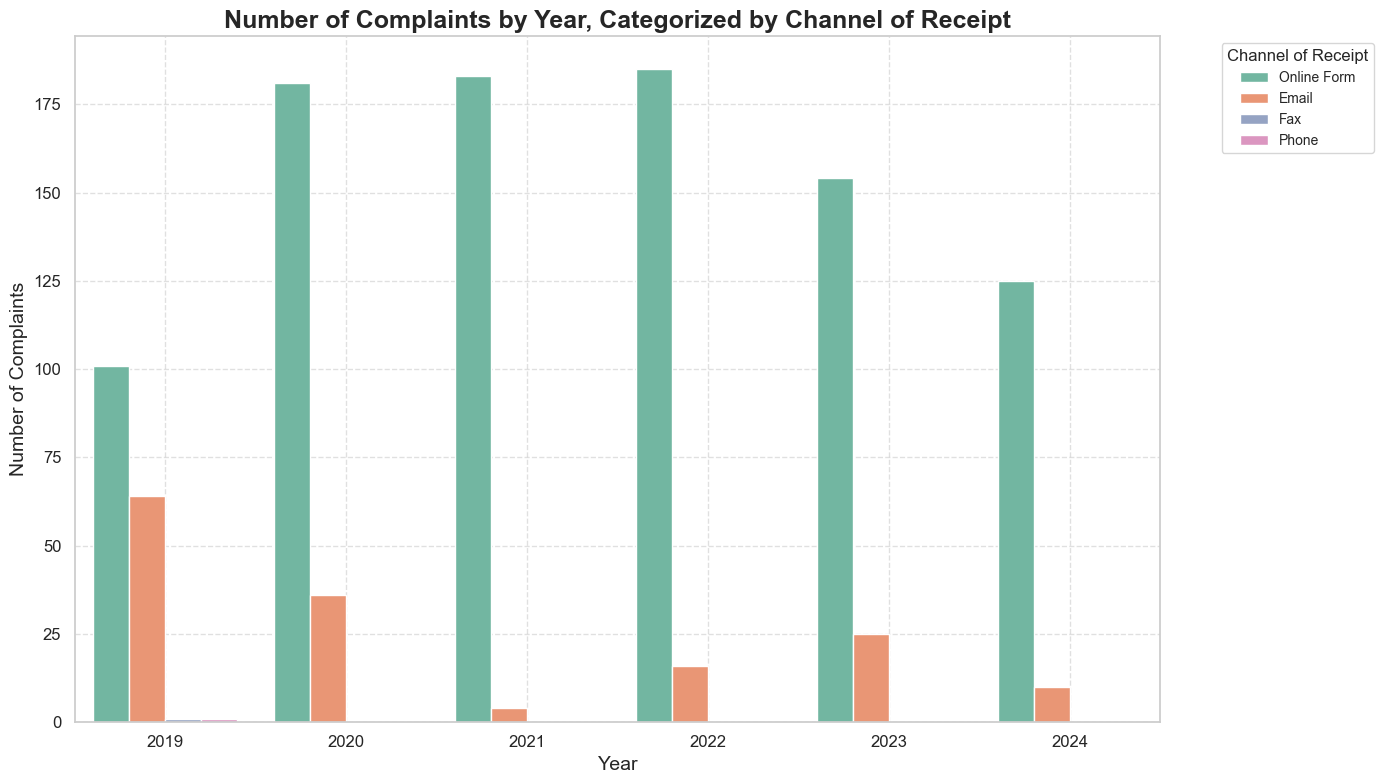

In [60]:
# Set the style to a professional and clean design
sns.set(style="whitegrid")

# Create the figure and axis objects
plt.figure(figsize=(14, 8))

# Plot the data using a countplot
ax = sns.countplot(x='Complaint Receipt Year', hue='Channel of Receipt', data=df_combined, palette='Set2')

# Add title and labels with professional formatting
plt.title('Number of Complaints by Year, Categorized by Channel of Receipt', fontsize=18, fontweight='bold')
plt.xlabel('Year', fontsize=14)
plt.ylabel('Number of Complaints', fontsize=14)

# Rotate the x-ticks for better readability
plt.xticks(rotation=0, fontsize=12)
plt.yticks(fontsize=12)

# Move the legend outside the plot
plt.legend(title='Channel of Receipt', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)

# Add grid lines for better readability
plt.grid(True, linestyle='--', alpha=0.6)

# Adjust the layout to make room for the legend
plt.tight_layout()

# Show the plot
plt.show()

##### Top 10 entities that were most frequently complained against

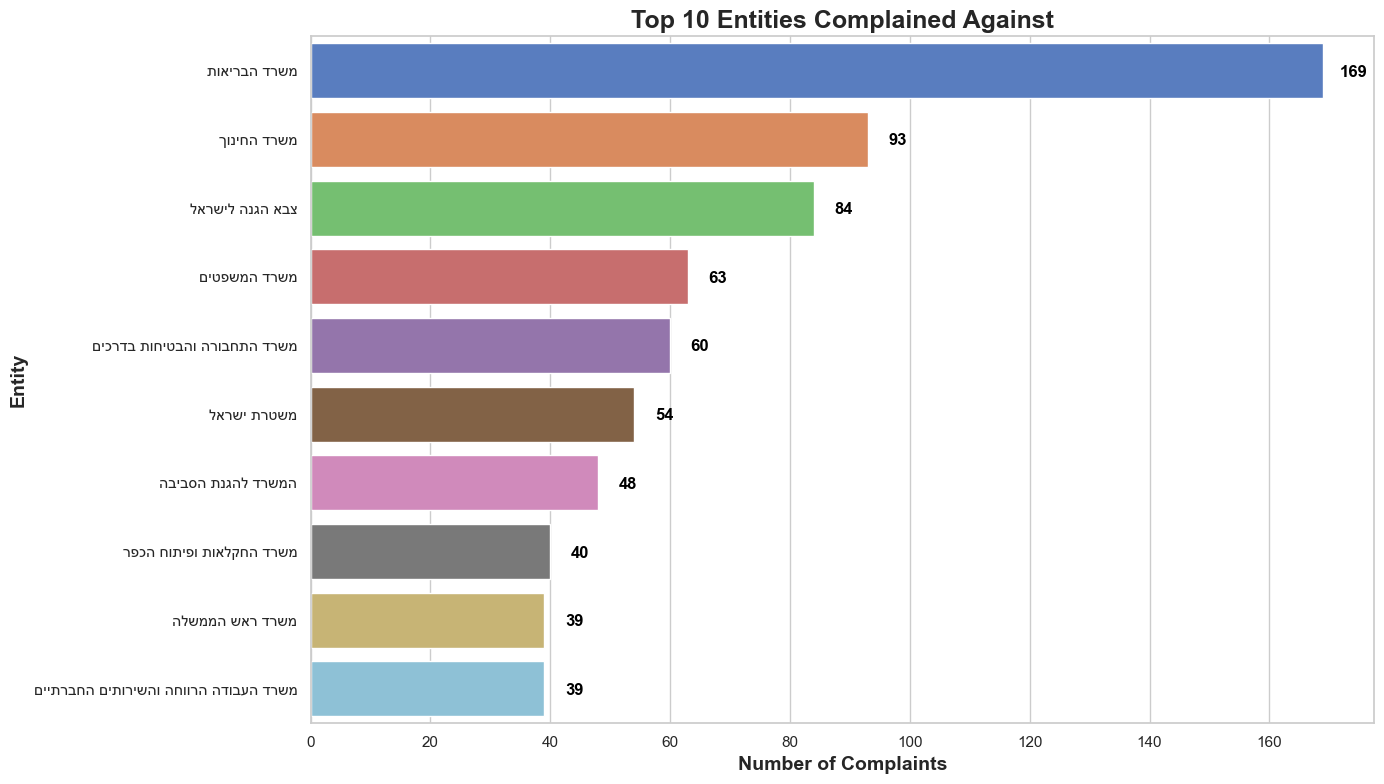

In [61]:
# Top 10 entities that were most frequently complained against

# Enable RTL (Right-to-Left) text support
mpl.rcParams['axes.unicode_minus'] = False
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# Get the top 10 most complained against entities
top_10_entities = df_combined['Entity Complained Against'].value_counts().head(10)

# Set the style to a professional and clean design
sns.set(style="whitegrid")

# Create the figure and axis objects
plt.figure(figsize=(14, 8))

# Plot the data using a barplot
ax = sns.barplot(x=top_10_entities.values, y=top_10_entities.index, 
                 hue=top_10_entities.index, palette='muted', dodge=False, legend=False)

# Reverse the text direction for the y-axis labels (Hebrew)
ax.set_yticks(range(len(top_10_entities)))
ax.set_yticklabels([label[::-1] for label in top_10_entities.index])

# Add title and labels with professional formatting
plt.title('Top 10 Entities Complained Against', fontsize=18, fontweight='bold')
plt.xlabel('Number of Complaints', fontsize=14)
plt.ylabel('Entity', fontsize=14)

# Add the exact number of complaints on top of each bar
for p in ax.patches:
    ax.annotate(f'{int(p.get_width())}', 
                (p.get_width() + 5, p.get_y() + p.get_height() / 2), 
                ha='center', va='center_baseline', 
                fontsize=12, color='black', fontweight='bold')

# Adjust layout for better readability
plt.tight_layout()

# Show the plot
plt.show()

##### Top 5 Entities Complained Against by Year

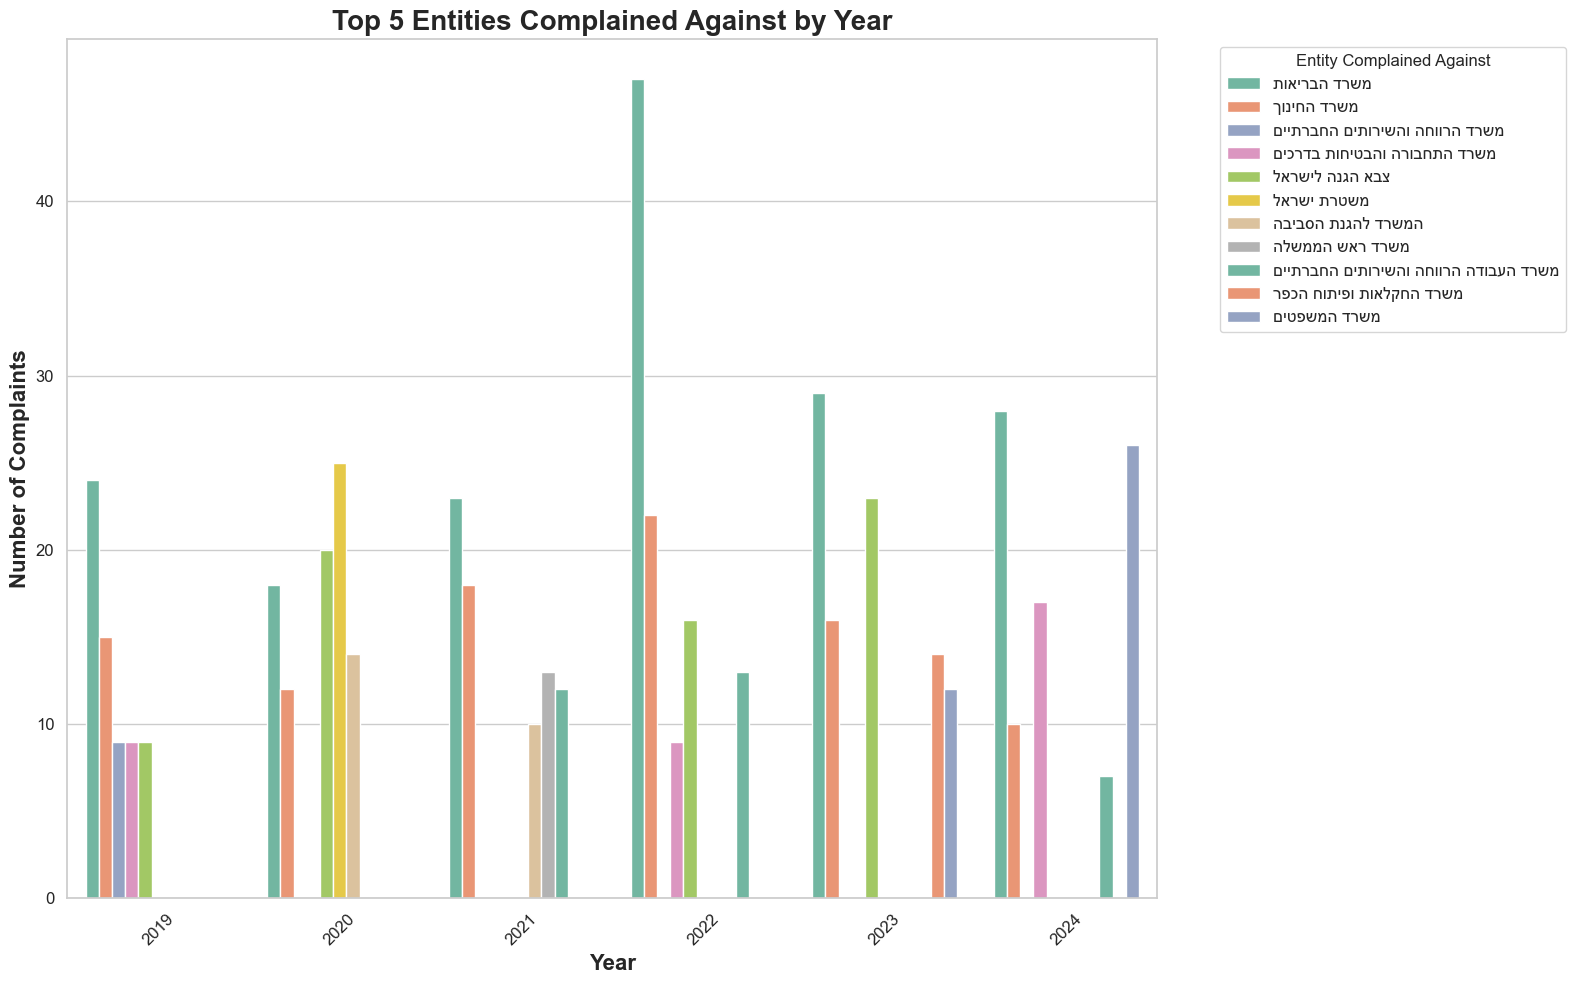

In [62]:
# Top 5 Entities Complained Against by Year

# Ensure proper display of Hebrew text
mpl.rcParams['axes.unicode_minus'] = False
mpl.rcParams['font.family'] = 'Arial'  
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# Group data by year and entity, and count the number of complaints
complaints_by_entity_year = df_combined.groupby(['Complaint Receipt Year', 'Entity Complained Against']).size().reset_index(name='Complaint Count')

# Sort values to identify top entities each year
complaints_by_entity_year = complaints_by_entity_year.sort_values(['Complaint Receipt Year', 'Complaint Count'], ascending=[True, False])

# For each year, get the top 5 entities (or adjust as needed)
top_entities_each_year = complaints_by_entity_year.groupby('Complaint Receipt Year').head(5)

# Reverse the Hebrew text for correct display in the plot using .loc[]
top_entities_each_year.loc[:, 'Entity Complained Against'] = top_entities_each_year['Entity Complained Against'].apply(lambda x: x[::-1])

# Set up the plot
plt.figure(figsize=(16, 10))
ax = sns.barplot(x='Complaint Receipt Year', y='Complaint Count', hue='Entity Complained Against', data=top_entities_each_year, palette='Set2')

# Add title and labels with professional formatting
plt.title('Top 5 Entities Complained Against by Year', fontsize=20, fontweight='bold')
plt.xlabel('Year', fontsize=16)
plt.ylabel('Number of Complaints', fontsize=16)

# Customize legend for better readability
plt.legend(title='Entity Complained Against', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12)

# Rotate the x-ticks for better readability
plt.xticks(rotation=45)

# Adjust layout for better readability
plt.tight_layout()

# Show the plot
plt.show()

##### Heatmap of Complaint Subjects for Top Entities

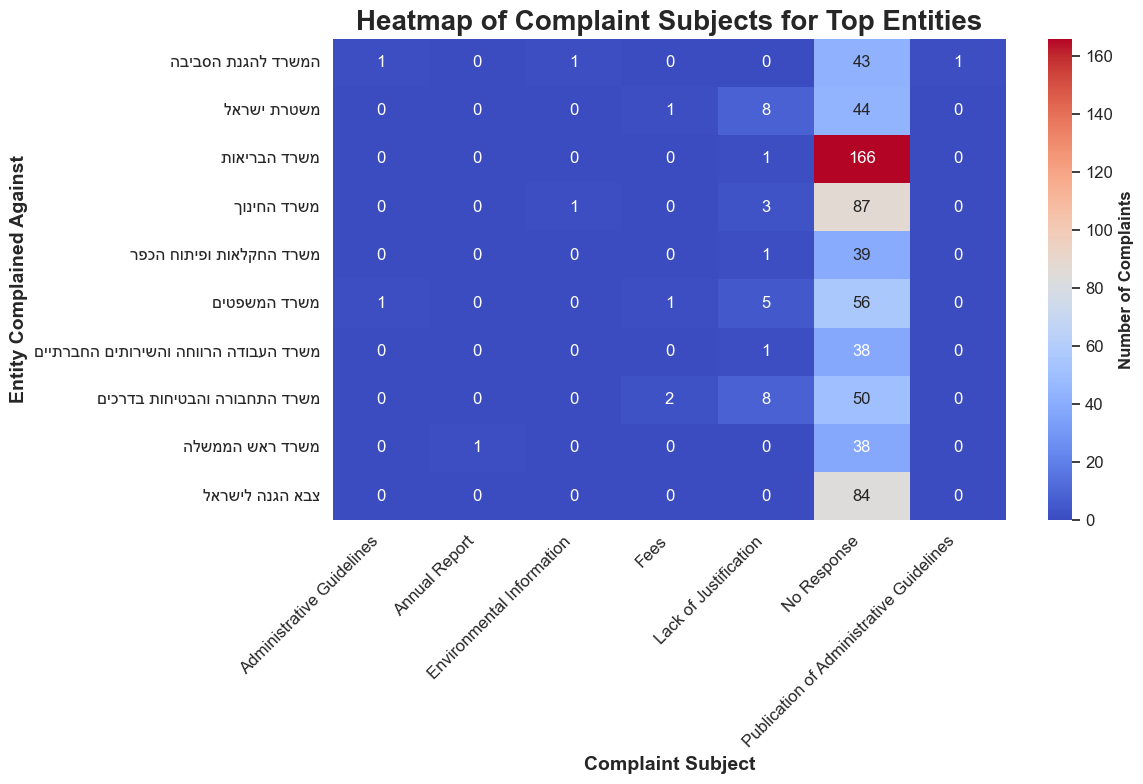

In [63]:
# Heatmap of Complaint Subjects for Top Entities

# Ensure proper display of Hebrew text
mpl.rcParams['axes.unicode_minus'] = False
mpl.rcParams['font.family'] = 'Arial'
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# Identify the Top Entities by Number of Complaints
top_entities = df_combined['Entity Complained Against'].value_counts().head(10).index.tolist()

# Filter the data for only the top entities and exclude 'Unknown'
filtered_df = df_combined[(df_combined['Entity Complained Against'].isin(top_entities)) &
                          (~df_combined['Complaint Subject'].isin(['Unknown']))]

# Create a pivot table for heatmap
heatmap_data = filtered_df.pivot_table(index='Entity Complained Against', 
                                       columns='Complaint Subject', 
                                       aggfunc='size', fill_value=0)

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, annot=True, fmt="d", cmap="coolwarm", cbar_kws={'label': 'Number of Complaints'})

# Title and labels
plt.title('Heatmap of Complaint Subjects for Top Entities', fontsize=20, fontweight='bold')
plt.xlabel('Complaint Subject', fontsize=14)
plt.ylabel('Entity Complained Against', fontsize=14)

# Reverse text for Hebrew on Y-axis and X-axis labels
ax = plt.gca()  # Get the current axis
ax.set_yticklabels([label.get_text()[::-1] for label in ax.get_yticklabels()])

# Rotate the x-ticks for better readability
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

#### Heatmap of Decision for Top Entities

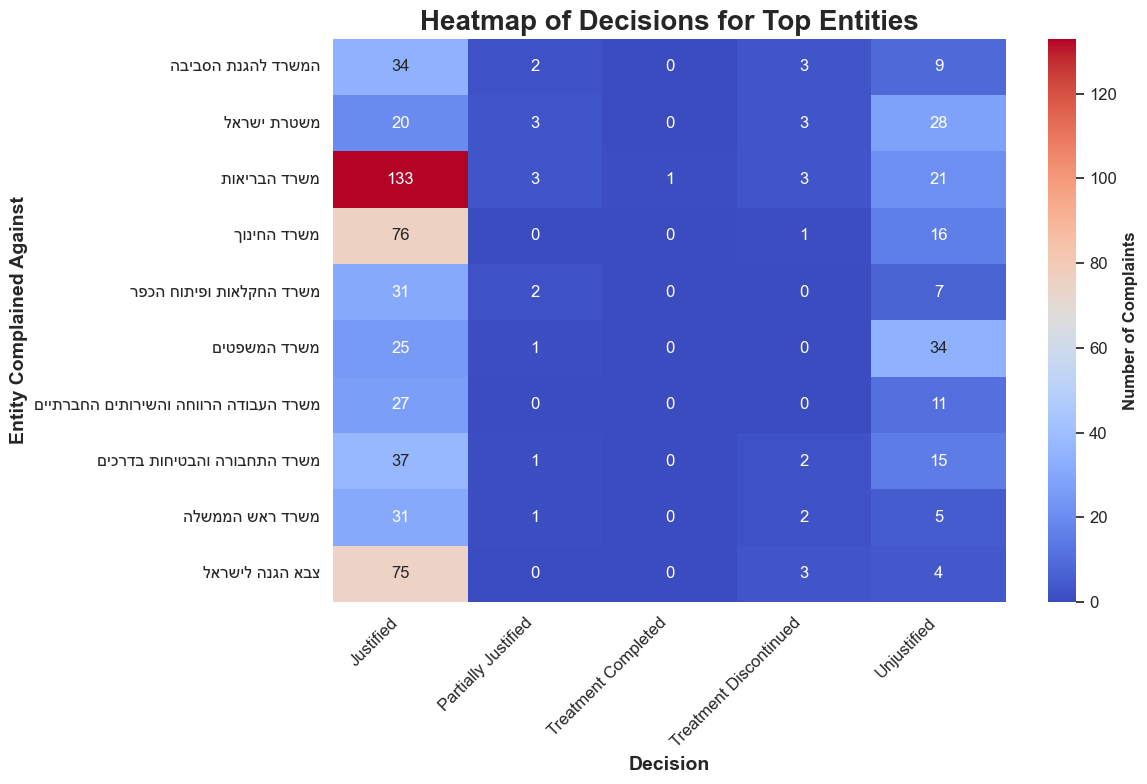

In [64]:
# Heatmap of Decision for Top Entities

# Ensure proper display of Hebrew text
mpl.rcParams['axes.unicode_minus'] = False
mpl.rcParams['font.family'] = 'Arial'
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# Identify the Top Entities by Number of Complaints
top_entities = df_combined['Entity Complained Against'].value_counts().head(10).index.tolist()

# Filter the data for only the top entities and exclude 'Unknown'
filtered_df = df_combined[(df_combined['Entity Complained Against'].isin(top_entities)) &
                          (~df_combined['Decision'].isin(['Unknown']))]

# Create a pivot table for heatmap
heatmap_data = filtered_df.pivot_table(index='Entity Complained Against', 
                                       columns='Decision', 
                                       aggfunc='size', fill_value=0)

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, annot=True, fmt="d", cmap="coolwarm", cbar_kws={'label': 'Number of Complaints'})

# Title and labels
plt.title('Heatmap of Decisions for Top Entities', fontsize=20, fontweight='bold')
plt.xlabel('Decision', fontsize=14)
plt.ylabel('Entity Complained Against', fontsize=14)

# Reverse text for Hebrew on Y-axis labels
ax = plt.gca()  # Get the current axis
ax.set_yticklabels([label.get_text()[::-1] for label in ax.get_yticklabels()])

# Rotate the x-ticks for better readability
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

##### Average Time to Decision by Entity

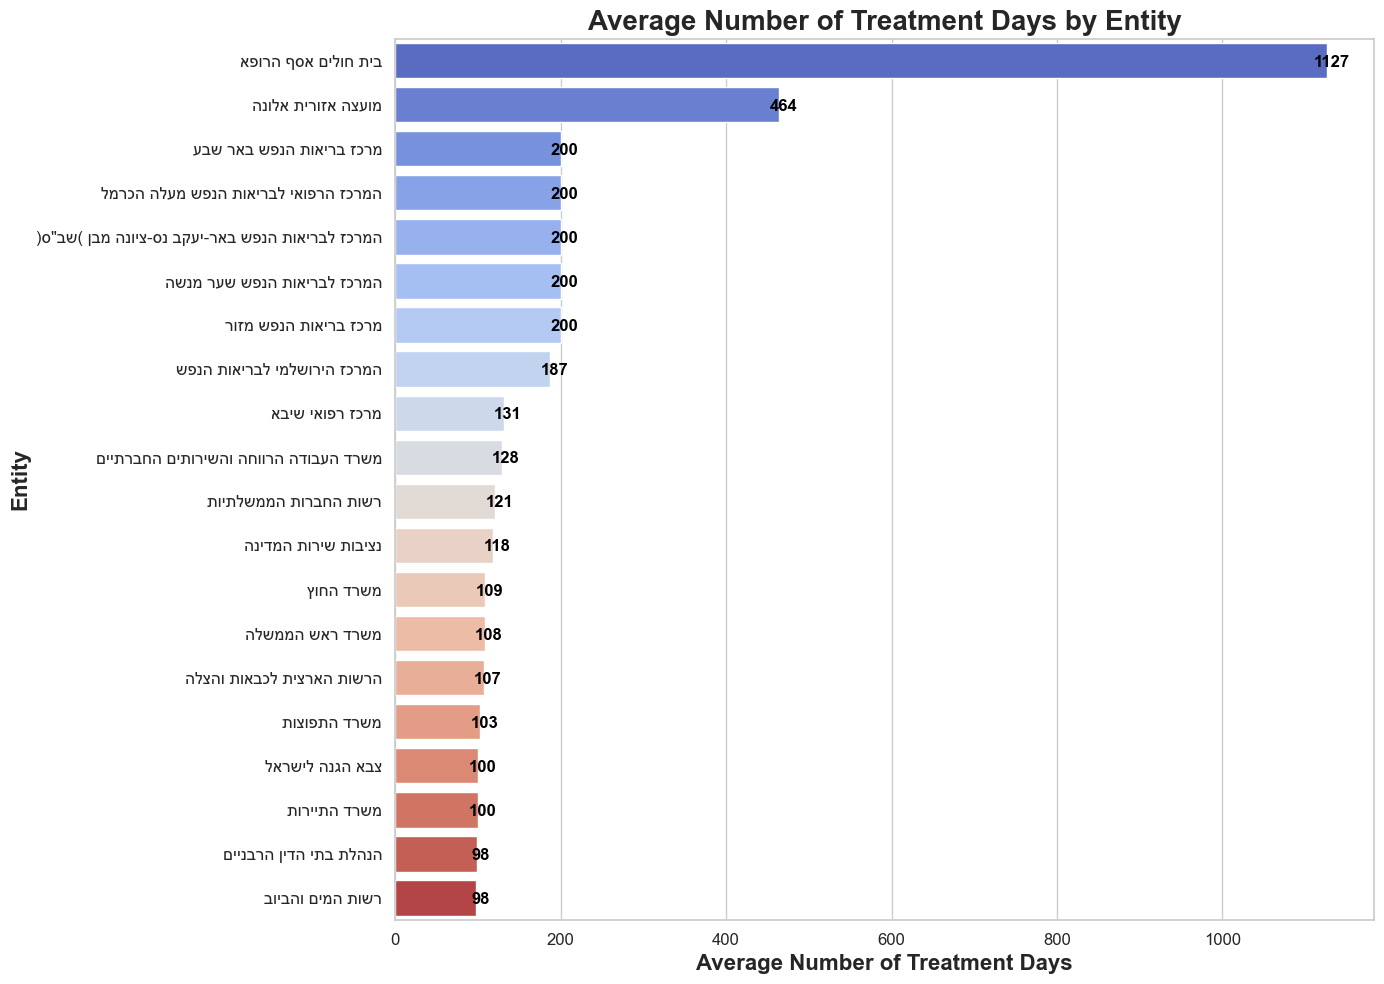

In [65]:
# Average Time to Decision by Entity

# Ensure proper display of Hebrew text
mpl.rcParams['axes.unicode_minus'] = False
mpl.rcParams['font.family'] = 'Arial'
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# Calculate the average number of treatment days by entity
avg_treatment_entity = df_combined.groupby('Entity Complained Against')['Number of Treatment Days'].mean().sort_values(ascending=False).head(20)

# Plot the average number of treatment days by entity
plt.figure(figsize=(14, 10))
ax = sns.barplot(x=avg_treatment_entity.values, y=avg_treatment_entity.index, palette='coolwarm', legend=False, hue=avg_treatment_entity.index)

# Set y-tick labels with reversed text for Hebrew
ax.set_yticks(range(len(avg_treatment_entity.index)))
ax.set_yticklabels([label[::-1] for label in avg_treatment_entity.index])

# Add the exact number of treatment days on top of each bar
for p in ax.patches:
    ax.annotate(f'{int(p.get_width())}', 
                (p.get_width() + 5, p.get_y() + p.get_height() / 2), 
                ha='center', va='center_baseline', 
                fontsize=12, color='black', fontweight='bold')

# Add titles and labels
plt.title('Average Number of Treatment Days by Entity', fontsize=20, fontweight='bold')
plt.xlabel('Average Number of Treatment Days', fontsize=16)
plt.ylabel('Entity', fontsize=16)

plt.tight_layout()
plt.show()

##### Average Time to Initial Response by Entity

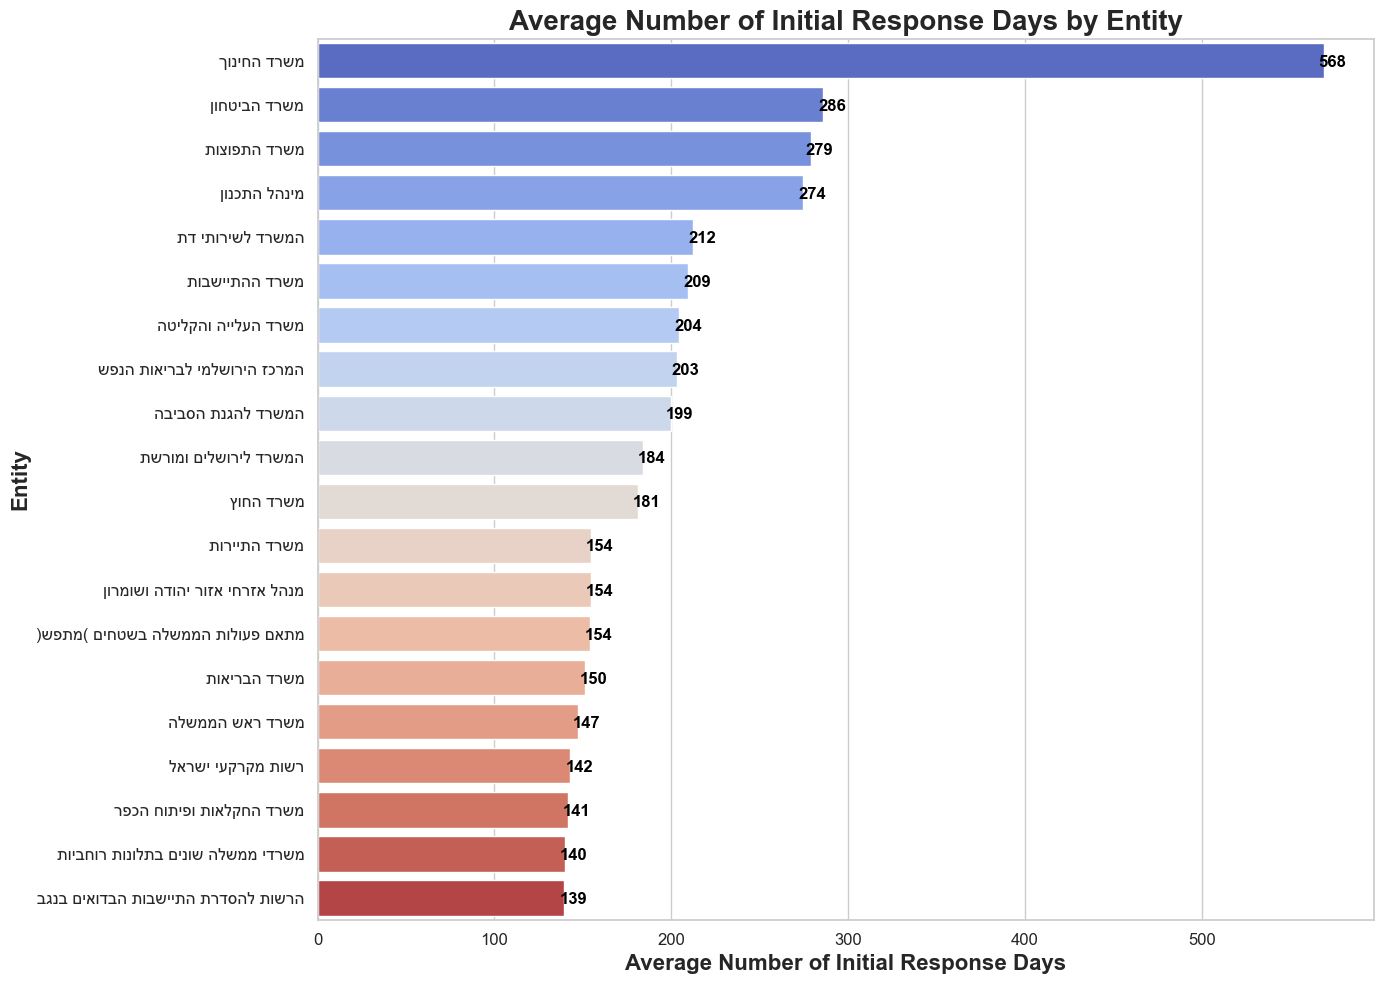

In [66]:
# Average Time to Initial Response by Entity

# Ensure proper display of Hebrew text
mpl.rcParams['axes.unicode_minus'] = False
mpl.rcParams['font.family'] = 'Arial'
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# Calculate the average number of treatment days by entity
avg_treatment_entity = df_combined.groupby('Entity Complained Against')['Initial Response Days'].mean().sort_values(ascending=False).head(20)

# Plot the average number of treatment days by entity
plt.figure(figsize=(14, 10))
ax = sns.barplot(x=avg_treatment_entity.values, y=avg_treatment_entity.index, palette='coolwarm', legend=False, hue=avg_treatment_entity.index)

# Set y-tick labels with reversed text for Hebrew
ax.set_yticks(range(len(avg_treatment_entity.index)))
ax.set_yticklabels([label[::-1] for label in avg_treatment_entity.index])

# Add the exact number of treatment days on top of each bar
for p in ax.patches:
    ax.annotate(f'{int(p.get_width())}', 
                (p.get_width() + 5, p.get_y() + p.get_height() / 2), 
                ha='center', va='center_baseline', 
                fontsize=12, color='black', fontweight='bold')

# Add titles and labels
plt.title('Average Number of Initial Response Days by Entity', fontsize=20, fontweight='bold')
plt.xlabel('Average Number of Initial Response Days', fontsize=16)
plt.ylabel('Entity', fontsize=16)

plt.tight_layout()
plt.show()

#### Success Rate by Entity (Percentage of Justified Complaints)

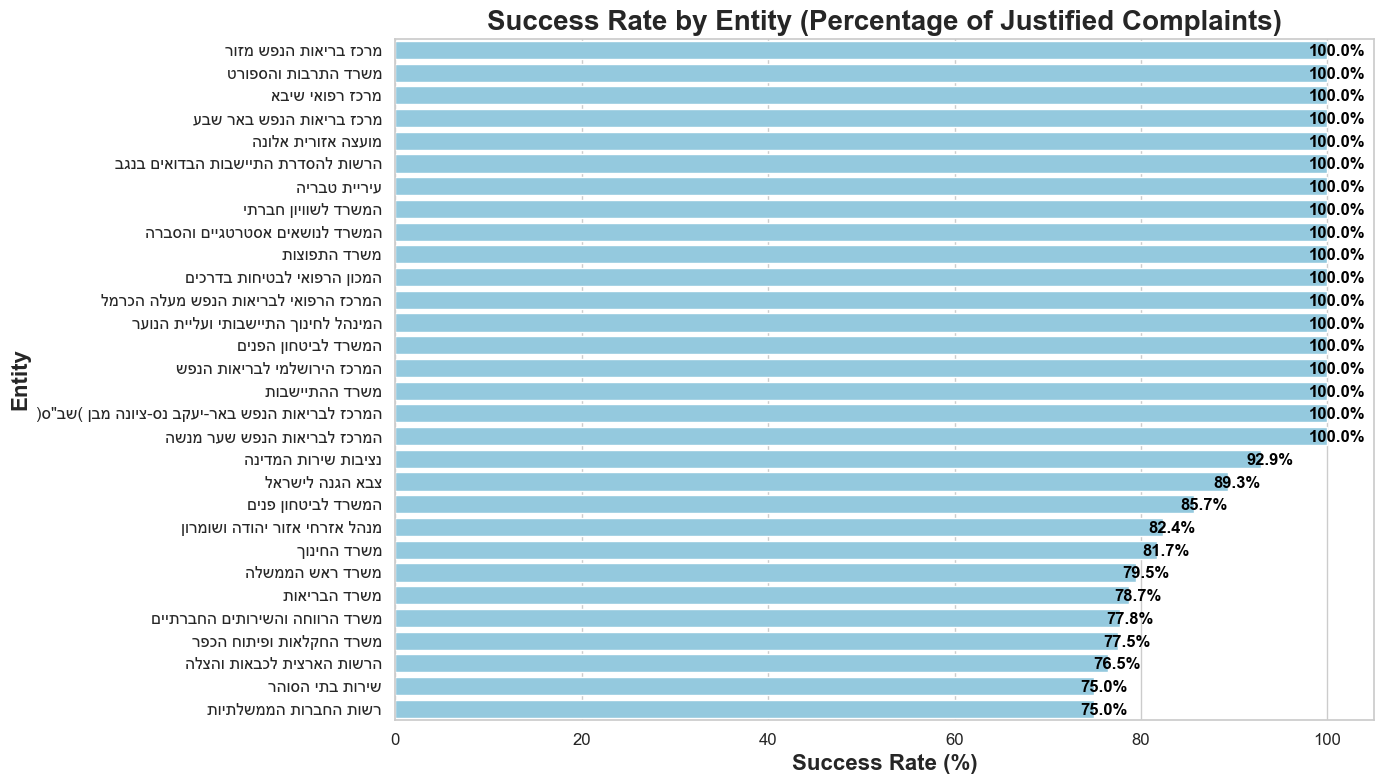

In [67]:
# Success Rate by Entity (Percentage of Justified Complaints)

# Ensure proper display of Hebrew text
mpl.rcParams['axes.unicode_minus'] = False
mpl.rcParams['font.family'] = 'Arial'
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# Calculate the success rate by entity
success_rate = df_combined[df_combined['Decision'] == 'Justified'].groupby('Entity Complained Against').size() / df_combined.groupby('Entity Complained Against').size() * 100

# Sort success rate for better visualization and limit to top 20 entities
success_rate = success_rate.sort_values(ascending=False).head(30)

# Plot the success rate by entity
plt.figure(figsize=(14, 8))
ax = sns.barplot(x=success_rate.values, y=success_rate.index, color='skyblue', legend=False)

# Set y-tick labels with reversed text for Hebrew
ax.set_yticks(range(len(success_rate)))
ax.set_yticklabels([label[::-1] for label in success_rate.index])

# Add titles and labels
plt.title('Success Rate by Entity (Percentage of Justified Complaints)', fontsize=20, fontweight='bold')
plt.xlabel('Success Rate (%)', fontsize=16)
plt.ylabel('Entity', fontsize=16)

# Add exact success rate on each bar
for p in ax.patches:
    ax.annotate(f'{p.get_width():.1f}%', 
                (p.get_width() + 1, p.get_y() + p.get_height() / 2), 
                ha='center', va='center_baseline', 
                fontsize=12, color='black', fontweight='bold')

plt.tight_layout()
plt.show()


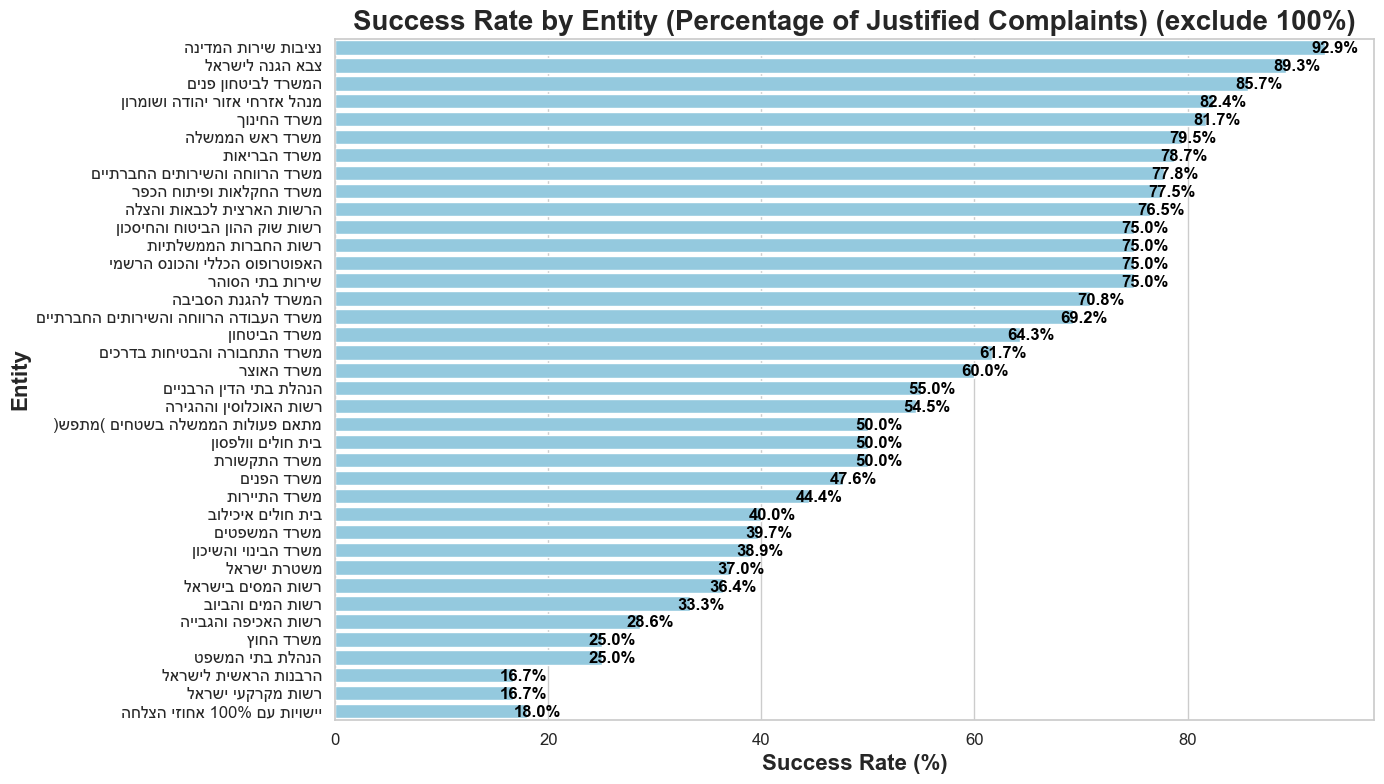

In [68]:
# Success Rate by Entity (Percentage of Justified Complaints) (exclude 100%)

# Ensure proper display of Hebrew text
import matplotlib as mpl
mpl.rcParams['axes.unicode_minus'] = False
mpl.rcParams['font.family'] = 'Arial'
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# Calculate the success rate by entity
success_rate = df_combined[df_combined['Decision'] == 'Justified'].groupby('Entity Complained Against').size() / df_combined.groupby('Entity Complained Against').size() * 100

# Combine all entities with 100% success rate into a single category
combined_success_rate = success_rate[success_rate < 100].sort_values(ascending=False)
combined_success_rate['יישויות עם %001 אחוזי הצלחה'] = len(success_rate[success_rate == 100])

# Plot the success rate by entity
plt.figure(figsize=(14, 8))
ax = sns.barplot(x=combined_success_rate.values, y=combined_success_rate.index, color='skyblue')

# Set y-tick labels with reversed text for Hebrew
ax.set_yticks(range(len(combined_success_rate)))
ax.set_yticklabels([label[::-1] for label in combined_success_rate.index])

# Add titles and labels
plt.title('Success Rate by Entity (Percentage of Justified Complaints) (exclude 100%)', fontsize=20, fontweight='bold')
plt.xlabel('Success Rate (%)', fontsize=16)
plt.ylabel('Entity', fontsize=16)

# Add exact success rate on each bar
for p in ax.patches:
    if p.get_width() > 1:  # For all bars except the combined category
        ax.annotate(f'{p.get_width():.1f}%', 
                    (p.get_width() + 1, p.get_y() + p.get_height() / 2), 
                    ha='center', va='center_baseline', 
                    fontsize=12, color='black', fontweight='bold')
    else:  # For the combined category
        ax.annotate(f'{int(p.get_width())} Entities', 
                    (p.get_width() + 1, p.get_y() + p.get_height() / 2), 
                    ha='center', va='center_baseline', 
                    fontsize=12, color='red', fontweight='bold')

plt.tight_layout()
plt.show()

#### Distribution of Complaints by Complainant Type
Note: Complainant Type is only relevant for the df_pre_2021_april meaning post april 2021

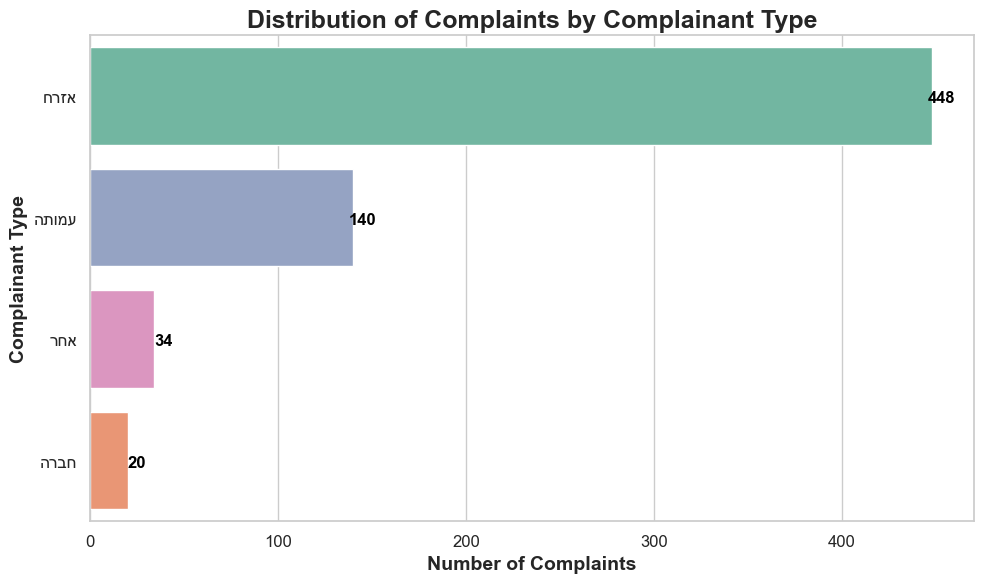

In [69]:
# Distribution of Complaints by Complainant Type

# Ensure proper display of Hebrew text
mpl.rcParams['axes.unicode_minus'] = False
mpl.rcParams['font.family'] = 'Arial'
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# Filter out rows where 'Complainant Type' is 'Unspecified'
df_filtered = df_combined[df_combined['Complainant Type'] != 'Unspecified']

# Plot the distribution of complaints by complainant type
plt.figure(figsize=(10, 6))
ax = sns.countplot(y='Complainant Type', data=df_filtered, 
                   order=df_filtered['Complainant Type'].value_counts().index, 
                   palette='Set2', hue='Complainant Type', legend=False)

# Set y-tick labels with reversed text for Hebrew
ax.set_yticks(range(len(ax.get_yticklabels())))
ax.set_yticklabels([label.get_text()[::-1] for label in ax.get_yticklabels()])

# Add titles and labels
plt.title('Distribution of Complaints by Complainant Type', fontsize=18, fontweight='bold')
plt.xlabel('Number of Complaints', fontsize=14)
plt.ylabel('Complainant Type', fontsize=14)

# Add exact number of complaints on each bar
for p in ax.patches:
    ax.annotate(f'{int(p.get_width())}', 
                (p.get_width() + 5, p.get_y() + p.get_height() / 2), 
                ha='center', va='center_baseline', 
                fontsize=12, color='black', fontweight='bold')

plt.tight_layout()
plt.show()

#### Average Number of Treatment Days by Complainant Type
Note: Complainant Type is only relevant for the df_pre_2021_april meaning post april 2021

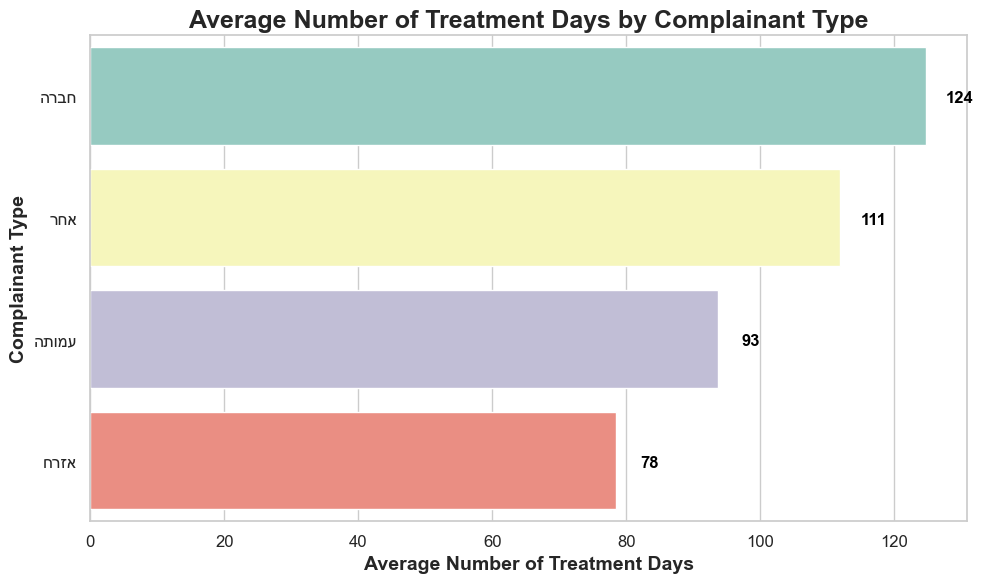

In [70]:
# Average Number of Treatment Days by Complainant Type

# Ensure proper display of Hebrew text
mpl.rcParams['axes.unicode_minus'] = False
mpl.rcParams['font.family'] = 'Arial'
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# Filter out rows where 'Complainant Type' is 'Unspecified'
df_filtered = df_combined[df_combined['Complainant Type'] != 'Unspecified']

# Calculate the average number of treatment days by complainant type
avg_treatment_complainant_type = df_filtered.groupby('Complainant Type')['Number of Treatment Days'].mean().sort_values(ascending=False)

# Plot the average number of treatment days by complainant type
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=avg_treatment_complainant_type.values, y=avg_treatment_complainant_type.index, hue=avg_treatment_complainant_type.index, palette='Set3', legend=False)

# Set y-tick labels with reversed text for Hebrew
ax.set_yticks(range(len(ax.get_yticklabels())))
ax.set_yticklabels([label.get_text()[::-1] for label in ax.get_yticklabels()])

# Add titles and labels
plt.title('Average Number of Treatment Days by Complainant Type', fontsize=18, fontweight='bold')
plt.xlabel('Average Number of Treatment Days', fontsize=14)
plt.ylabel('Complainant Type', fontsize=14)

# Add exact average days on each bar
ax = plt.gca()
for p in ax.patches:
    ax.annotate(f'{int(p.get_width())}', 
                (p.get_width() + 5, p.get_y() + p.get_height() / 2), 
                ha='center', va='center_baseline', 
                fontsize=12, color='black', fontweight='bold')

plt.tight_layout()
plt.show()


#### Distribution of Complaint Subjects by Complainant Type
Note: Complainant Type is only relevant for the df_pre_2021_april meaning post april 2021

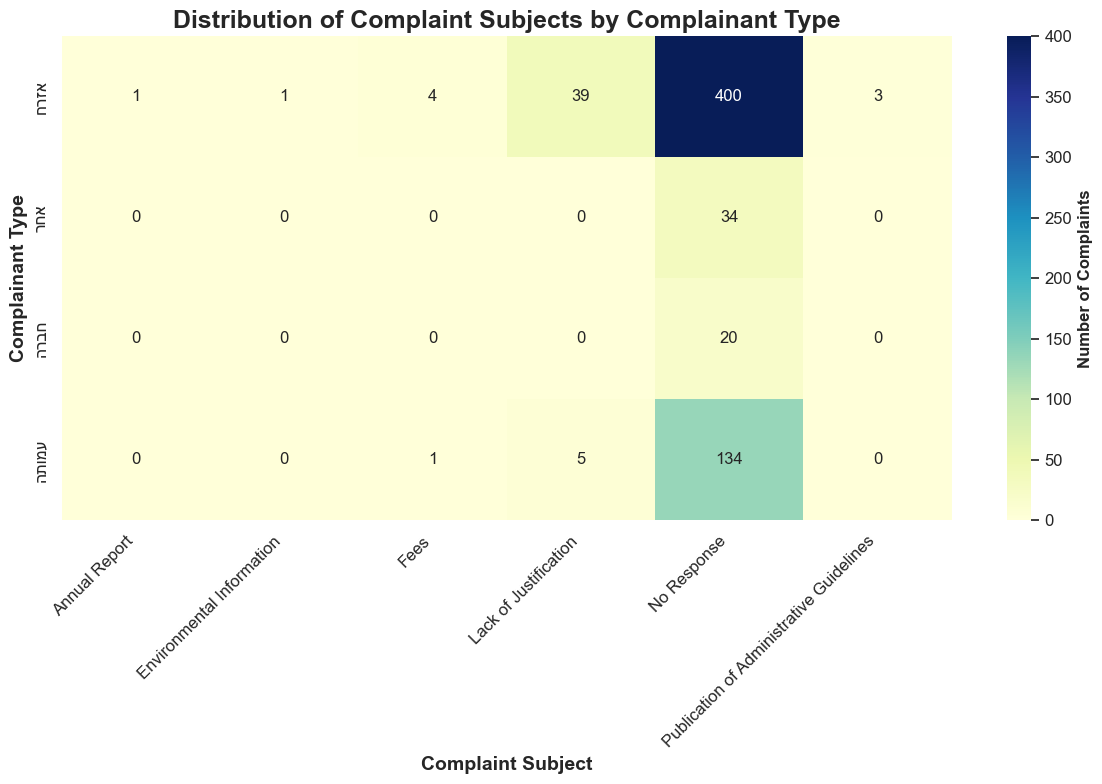

In [71]:
# Distribution of Complaint Subjects by Complainant Type

# Ensure proper display of Hebrew text
mpl.rcParams['axes.unicode_minus'] = False
mpl.rcParams['font.family'] = 'Arial'
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# Exclude 'Unknown' Complaint Subject for clarity and Filter out rows where 'Complainant Type' is 'Unspecified'
filtered_df = df_combined[(df_combined['Complaint Subject'] != 'Unknown') & (df_combined['Complainant Type'] != 'Unspecified')]

# Create a crosstab to see the distribution of complaint subjects by complainant type
complaint_subjects_by_type = pd.crosstab(filtered_df['Complainant Type'], filtered_df['Complaint Subject'])

# Plot the distribution using a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(complaint_subjects_by_type, annot=True, cmap="YlGnBu", fmt="d", cbar_kws={'label': 'Number of Complaints'})

# Reverse text for Hebrew on Y-axis labels
ax = plt.gca()  # Get the current axis
ax.set_yticklabels([label.get_text()[::-1] for label in ax.get_yticklabels()])

# Add titles and labels
plt.title('Distribution of Complaint Subjects by Complainant Type', fontsize=18, fontweight='bold')
plt.xlabel('Complaint Subject', fontsize=14)
plt.ylabel('Complainant Type', fontsize=14)

# Rotate the x-ticks for better readability
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()


#### Correlations

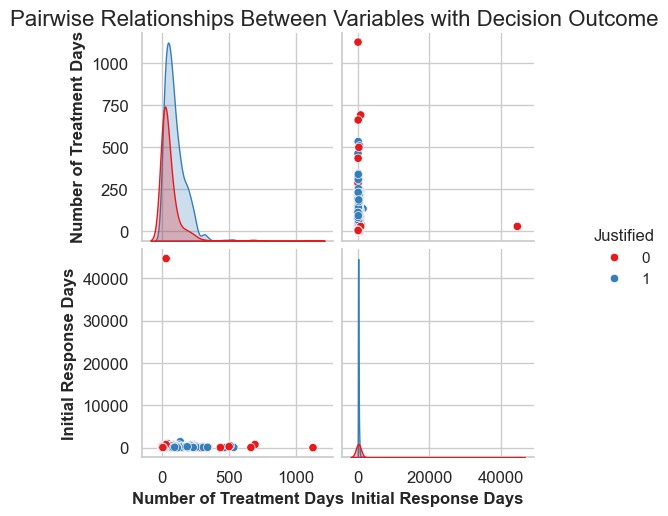

In [72]:
# Pairwise Relationships Between Variables with Decision Outcome

# Selecting relevant columns for pairplot
pairplot_columns = ['Number of Treatment Days', 'Initial Response Days', 'Justified']

# Plot pairwise relationships with hue based on the 'Justified' column
sns.pairplot(df_combined[pairplot_columns], hue='Justified', palette='Set1', diag_kind='kde')

plt.suptitle('Pairwise Relationships Between Variables with Decision Outcome', fontsize=16, y=1.02)
plt.show()

This visualization represents pairwise relationships between the variables "Number of Treatment Days," "Initial Response Days," and the "Justified" decision outcome using a scatterplot matrix (pairplot).

Distribution of Variables:
    Number of Treatment Days: Most data points cluster near the lower end, indicating that the majority of complaints are resolved within a shorter time frame. However, there are a few outliers with a very high number of treatment days, as shown by the long tail in the distribution.
    Initial Response Days: Similar to the "Number of Treatment Days," most data points cluster at the lower end, with a few extreme outliers that stand out.

Extreme Outliers:
    The presence of extreme outliers, particularly in the "Initial Response Days" variable, indicates potential issues with data quality, such as data entry errors or genuinely extraordinary cases. These outliers might need further investigation.

General Insights:
    There doesn’t appear to be a strong, linear relationship between either "Number of Treatment Days" or "Initial Response Days" with the decision outcome being justified or not.
    The data is highly skewed, with most values concentrated at the lower end for both "Number of Treatment Days" and "Initial Response Days."

In [73]:
### Understand the combined effect of the variables on the decision outcome using logistic regression model



# Proceed with the logistic regression preparation
df_logistic = df_combined[['Number of Treatment Days', 'Initial Response Days', 'Justified']].dropna()

# Define the independent variables (X) and the dependent variable (y)
X = df_logistic[['Number of Treatment Days', 'Initial Response Days']]
y = df_logistic['Justified']

# Add a constant to the model (intercept)
X = sm.add_constant(X)

# Fit the logistic regression model
logit_model = sm.Logit(y, X)
result = logit_model.fit()

# Display the summary of the logistic regression model
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.619369
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:              Justified   No. Observations:                 1085
Model:                          Logit   Df Residuals:                     1082
Method:                           MLE   Df Model:                            2
Date:                Tue, 13 Aug 2024   Pseudo R-squ.:                 0.04273
Time:                        19:35:54   Log-Likelihood:                -672.02
converged:                       True   LL-Null:                       -702.01
Covariance Type:            nonrobust   LLR p-value:                 9.372e-14
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        0.0907      0.097      0.935      0.350      -0.099

##### Remarx on Interpret the Logistic Regression Results

Log-Likelihood and Pseudo R-squared:

    The Log-Likelihood value (-672.36) and Pseudo R-squared (0.04333) suggest that the model has a moderate fit, but there may be room for improvement.

Coefficients (coef):

    Number of Treatment Days has a positive coefficient (0.0077) and is statistically significant (p < 0.001). This indicates that as the number of treatment days increases, the likelihood of a complaint being justified also increases, although the effect size is relatively small.
    Initial Response Days has a near-zero coefficient (-6.367e-05) and is not statistically significant (p = 0.455), suggesting it has little to no effect on whether a complaint is justified.
    Complaint Receipt Month also shows a near-zero effect (0.0043) and is not statistically significant (p = 0.821), indicating that the month in which a complaint is received does not significantly influence the outcome.

P-values:

    Number of Treatment Days has a p-value < 0.001, making it a significant predictor.
    Both Initial Response Days and Complaint Receipt Month have p-values > 0.05, indicating they are not significant predictors in this model.